# **Relatório Técnico Imobiliário / Real Estate Technical Report**

## **Observação sobre o projeto**
* O projeto parte de um desafio enfrentado pela HabitaData Analytics, especializada em análise de mercado imobiliário. A empresa busca aprimorar a estimativa do valor justo de compra de imóveis, considerando características como área, número de banheiros e ano de construção. Preços mal avaliados comprometem a margem de lucro na revenda. Assim, a precisão na análise de dados é essencial para garantir bons investimentos e maximizar o retorno financeiro.


* O diretor executivo da HabitaData Analytics me atribuiu, como analista de dados da empresa, a responsabilidade de conduzir um estudo detalhado a partir de um conjunto de informações do mercado imobiliário, com o objetivo de gerar insights que apoiem decisões estratégicas de compra e revenda de propriedades. O foco da análise foi direcionado para responder às seguintes questões-chave:


1.    Com base nas características estruturais e localizações dos imóveis, qual seria uma faixa de valor considerada adequada para aquisição?


2.   Quais atributos físicos ou de localização exercem maior influência na variação dos preços de mercado?


3. Existe uma tendência de que imóveis situados em áreas residenciais menos densas apresentem valores médios superiores em comparação com regiões mais densamente povoadas?


<font style="color:red">

**Este projeto é fictício, assim, os nomes da empresa, cargos e dados utilizados foram criados para simular um ambiente corporativo realista, com o objetivo de tornar a análise mais próxima das aplicações práticas em projetos de ciência de dados.**

</font>



# **Estratégia de Solução do Problema **


1.   Importar o dataset ;
2.   Verificar o tamanho e a estrutura do conjunto de dados ;
3.   Identificar valores ausentes ou nulos ;
4.   Analisar os tipos de variáveis disponíveis ;
5.   Realizar uma análise exploratória dos dados ;


  *   #### Analisar hipóteses

      *   Imóveis com área construída menor apresentam preços mais baixos?
      *   Quanto maior o número de banheiros, maior é o preço do imóvel?
      *   Imóveis mais novos possuem preços mais elevados?
      *   Imóveis com aquecimento de melhor qualidade tendem a custar mais?
      *   A quantidade de vagas de garagem influencia no valor do imóvel?
      *   Presença de lareira está associada a preços mais altos?
      *   Imóveis situados em regiões de densidade populacional média têm preços mais altos?
6.    *    O número de cômodos impacta no valor de compra do imóvel?
      *   O nível de acabamento influencia significativamente o preço final do imóvel ?
 * #### **Obtenção de Insights**

7.  Explorar as correlações entre as variáveis para entender suas relações;
8.  Preparar os dados para aplicar um modelo de regressão linear múltipla, com o objetivo de prever o valor do imóvel com base em suas características;
9.  Construir e treinar o modelo de regressão;
10.  Responder questionamentos do projeto feito pelo diretor executivo:
    * #### **Qual seria o valor estimado de venda de um imóvel com as seguintes especificações? **

      * Área construída / Built area: 8.750 pés²/ft²
      * Nível de acabamento / Level of finish: 6
      * Ano em que foi construído / Year built: 1985
      * Quantidade de banheiros / Number of bathrooms: 3
      * Número de cômodos / Number of rooms: 7
      * Total de lareiras / Number of fireplaces: 1
      * Vagas disponíveis na garagem / Garage spaces available: 2
      * Localizado em uma zona residencial de média densidade populacional / Located in a medium-density residential zone

    * #### **Quais atributos do imóvel exercem maior influência no preço final de venda ?**
    * #### **Imóveis situados em áreas residenciais com menor densidade tendem a apresentar preços mais elevados do que os localizados em zonas de maior densidade?**


# 11. **Conclusão**




# **Importando Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Importando Dados**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Dados House Price/dados-imóveis.csv" , sep = ";")
df.head()

,Id,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco
0,1,RL,9600,6,1976,Ex,2,3,4,6,1,2,181500
1,2,RL,14115,5,1993,Ex,1,1,2,5,0,2,143000
2,3,RL,11200,5,1965,Ex,1,3,4,5,0,1,129500
3,4,RL,12968,5,1962,TA,1,2,3,4,0,1,144000
4,5,RL,10920,6,1960,TA,1,2,3,5,1,1,157000


# **Dicionário de dados fornecido pela empresa:**



*   Zona : Classificação geográfica de vendas
       * RL: Zona residencial de baixa densidade
       * RM: Zona residencial de média densidade
*   Area: Área Territorial  (pés quadrados)
*   Qualidade: Qualidade Construtiva
*   AnoConstrucao: Ano de Construção do Imóvel
*   QualidadeAquecimento: Qualidade do Sistema de Aquecimento
       *  Ex	Excelente / Excellent
       *  Gd	Bom / Good
       * TA	Mediano / Average
       * Fa	Aceitável / Fair
*   Banheiros: Quantidade de Banheiros
*   Quartos_t1: Quantidade de Quartos Tipo 1
*   Quartos_t2: Quantidade de Quartos Tipo 2
*   Comodos: Quantidade de Cômodos no Imóvel
*   Lareiras: Quantidade de Lareiras no Imóvel
*   Garagem: Quantidade de vagas por Veículo
*   Preco: Valor de mercado do imóvel (em dólar/USD)

# **2. Análise de Valores Importantes para Manipulação dos Dados**

In [3]:
df.describe()

,Id,Area,Qualidade,AnoConstrucao,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,8932.025437,5.642289,1974.421304,1.370429,2.651828,3.651828,5.782194,0.515103,1.608903,148234.538951
std,181.72094,3318.885535,0.892748,19.189939,0.483304,0.551129,0.551129,1.039936,0.601361,0.577980,28088.037518
min,1.00000,1300.000000,4.000000,1940.000000,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,80000.000000
25%,158.00000,7420.000000,5.000000,1959.000000,1.000000,2.000000,3.000000,5.000000,0.000000,1.000000,129000.000000
50%,315.00000,9000.000000,6.000000,1971.000000,1.000000,3.000000,4.000000,6.000000,0.000000,2.000000,147000.000000
75%,472.00000,10530.000000,6.000000,1993.000000,2.000000,3.000000,4.000000,6.000000,1.000000,2.000000,173000.000000
max,629.00000,19900.000000,8.000000,2009.000000,2.000000,3.000000,4.000000,8.000000,2.000000,3.000000,200000.000000


# **3. Análise do Tipo dos Dados Fornecidos**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    629 non-null    int64 
 1   Zona                  629 non-null    object
 2   Area                  629 non-null    int64 
 3   Qualidade             629 non-null    int64 
 4   AnoConstrucao         629 non-null    int64 
 5   QualidadeAquecimento  629 non-null    object
 6   Banheiros             629 non-null    int64 
 7   Quartos_t1            629 non-null    int64 
 8   Quartos_t2            629 non-null    int64 
 9   Comodos               629 non-null    int64 
 10  Lareiras              629 non-null    int64 
 11  Garagem               629 non-null    int64 
 12  Preco                 629 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 64.0+ KB


# **4. Análise de Números Nulos/Faltantes**

In [5]:
df.isna().sum()

,0
Id,0
Zona,0
Area,0
Qualidade,0
AnoConstrucao,0
QualidadeAquecimento,0
Banheiros,0
Quartos_t1,0
Quartos_t2,0
Comodos,0


# **5. Análise Explorárotia de Dados / Exploratory Data Analysis (EDA)**

* ##     5.1. ANÁLISE DA COLUNA (PRECO)

In [6]:
df["Preco"].value_counts()

,count
Preco,
140000,15
155000,10
135000,9
190000,9
180000,9
...,...
193879,1
156932,1
155835,1


In [7]:
df["Preco"].describe()

,Preco
count,629.000000
mean,148234.538951
std,28088.037518
min,80000.000000
25%,129000.000000
50%,147000.000000
75%,173000.000000
max,200000.000000


###Histograma do Preço dos Imóveis

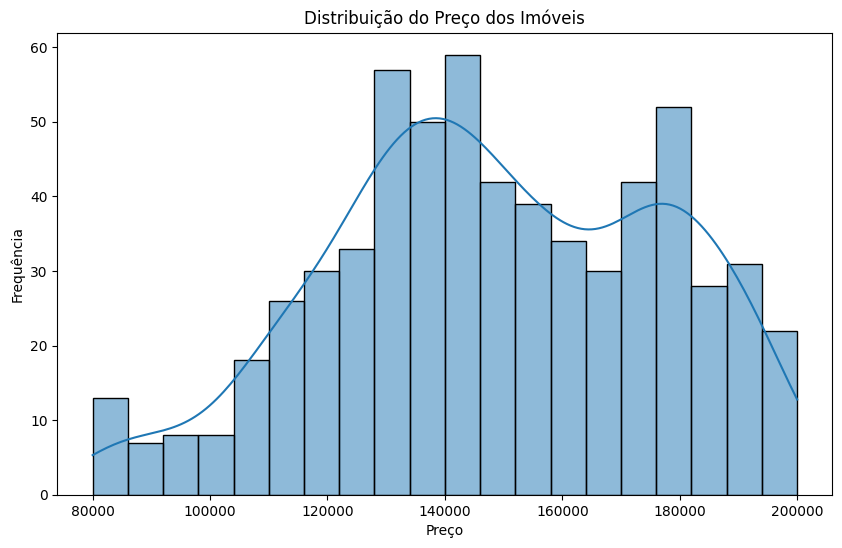

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Preco'], bins=20, kde=True)
plt.title('Distribuição do Preço dos Imóveis')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

##### Analisando o Histograma vemos que a curva de distribuição normal é bem parecida a ditribuição de frequência dos preços, mesmo sabendo que o máximo local perto de 130000, 140000 e 180000 existem. Dessa forma não irei realizar nenhuma mudança de variável para adequá-lo ao modelo de regressão linear.


###Boxplot do Preço dos Imóveis

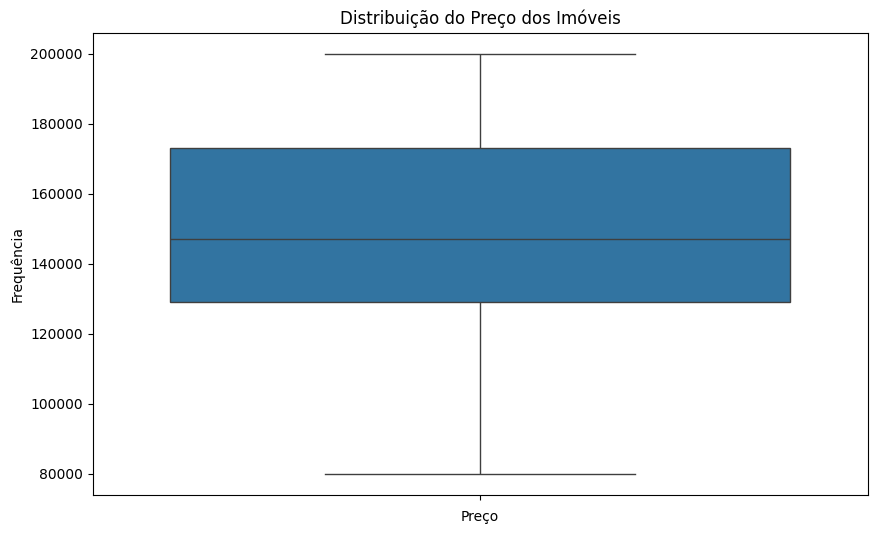

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Preco'])
plt.title('Distribuição do Preço dos Imóveis')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

In [10]:
index = {
    "count": "Quantidade",
    "mean": "Média",
    "std": "Desvio Padrão",
}
tabela_descritiva_preco = pd.DataFrame(data = df['Preco'].describe().round(2))
tabela_descritiva_preco.rename(index = index, columns = {'Preco':'Descrição Estatística do Preço'}, inplace = True)
tabela_descritiva_preco = tabela_descritiva_preco.reset_index()
tabela_descritiva_preco

,index,Descrição Estatística do Preço
0,Quantidade,629.00
1,Média,148234.54
2,Desvio Padrão,28088.04
3,min,80000.00
4,25%,129000.00
5,50%,147000.00
6,75%,173000.00
7,max,200000.00


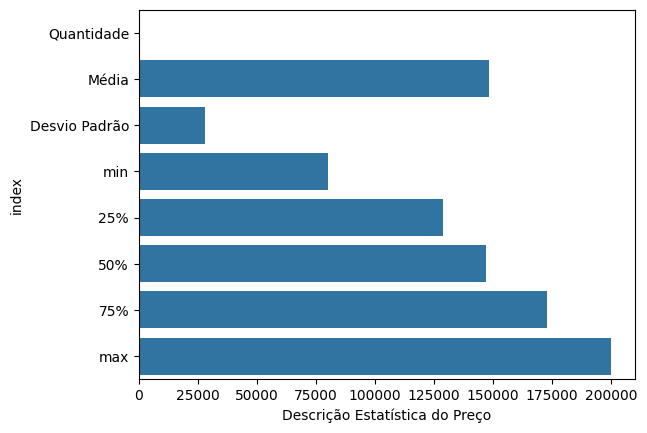

In [11]:
sns.barplot(data = tabela_descritiva_preco, y = "index", x= "Descrição Estatística do Preço");

##### Analisando o Boxplot e a Tabela descritiva, vemos que não existe nenhum outlier e podemos afirmar também que a média de preços dos imóveis é de aproximadamente 148000, podendo ver também que 75% dos imóveis são acima de 129000. Pode-se também analisar que as pessoas precisam ter no mínimo 80000 para adquirir um imóvel.


* ##     5.2. ANÁLISE DA COLUNA (AREA)

#### Imóveis com área construída menor apresentam preços mais baixos?

In [12]:
#Analisando a coluna Area para ter uma melhor visualização da distribuição
df["Area"].value_counts().reset_index()

,Area,count
0,9600,16
1,7200,14
2,1680,10
3,8400,7
4,3182,6
...,...,...
481,9180,1
482,7945,1
483,7742,1
484,9735,1


In [13]:
# Realizando um agrupamento para analisar a relação da área com o preço.
area_preco = df.groupby("Area").agg(media_preco = ("Preco","mean")).reset_index()
area_preco["Area"] = area_preco["Area"]
area_preco

,Area,media_preco
0,1300,124000.0
1,1477,80000.0
2,1526,86000.0
3,1533,94500.0
4,1596,91000.0
...,...,...
481,18450,129000.0
482,18800,190000.0
483,19138,141000.0
484,19296,176000.0


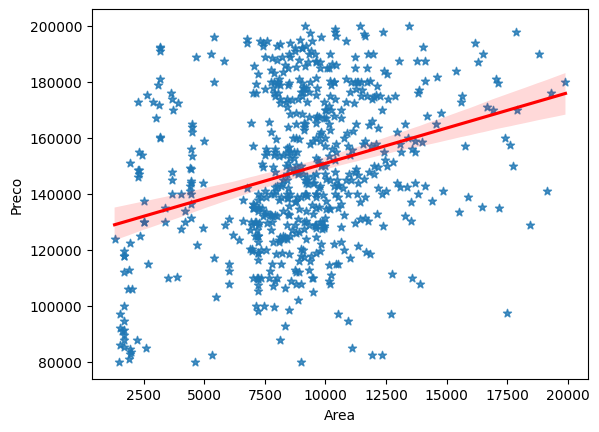

In [14]:
# Analisando um gráfico de dispersão para ver a relação da área com o preço de compra
grafico_dispercao = sns.regplot(
    data=df, x = "Area", y = "Preco",
    marker = "*", line_kws={"color":"red"})

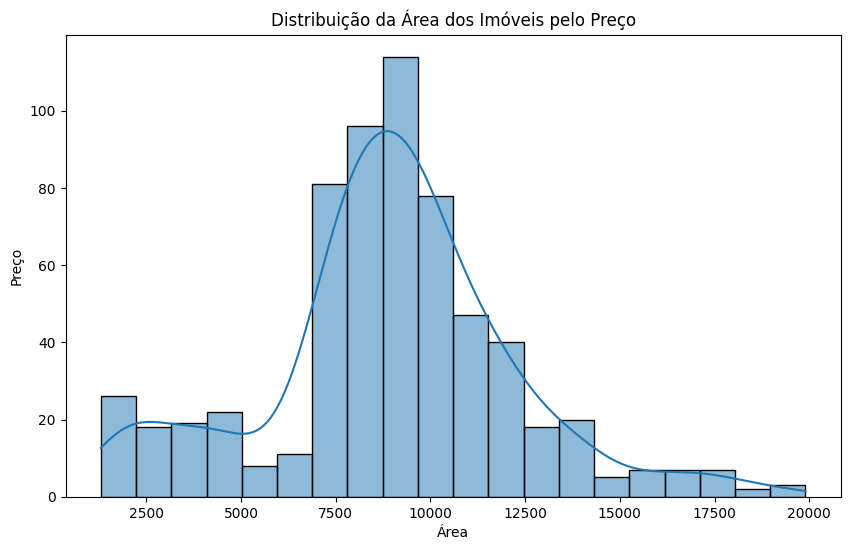

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['Area'], bins=20, kde=True)
plt.title('Distribuição da Área dos Imóveis pelo Preço')
plt.xlabel('Área')
plt.ylabel('Preço')
plt.show()

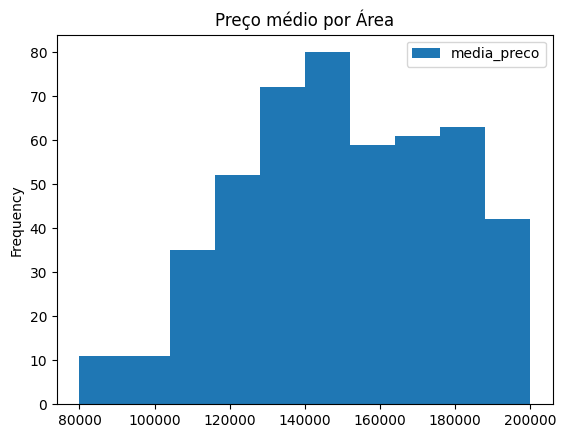

In [16]:
area_preco = df.groupby("Area").agg(media_preco = ("Preco","mean")).reset_index()
area_preco["Area"] = area_preco["Area"]
area_preco.plot(x = "Area", y = "media_preco", kind = "hist", title = "Preço médio por Área");

In [17]:
index = {
    "count": "Quantidade",
    "mean": "Média",
    "std": "Desvio Padrão",
}
tabela_descritiva_area = pd.DataFrame(data = df['Area'].describe().round(2))
tabela_descritiva_area.rename(index = index, columns = {'Area':'Descrição Estatística da Área'}, inplace = True)
tabela_descritiva_area

,Descrição Estatística da Área
Quantidade,629.00
Média,8932.03
Desvio Padrão,3318.89
min,1300.00
25%,7420.00
50%,9000.00
75%,10530.00
max,19900.00


##### Obsrevando os gráficos e a tabela de descrição estatística da área, podemos concluir que dos 629 imóveis mais de 70% tem área maior do que 7420 pés² que corresponde a aproximadamente 690m². Além disso, é válido ressaltar a concentração de imóveis na faixa de área entre 7500 e 12000 pés² de acordo com o Histograma visto acima. Foi analisado também que alguns valores de imóveis com áreas maiores estão com valores muito baixo. Sobre esse ponto não consegui concluir a verdadeira causa desse aspecto acontecendo, mas uma das possíveis causas pode ser a zona em qual esse imóvel está localizado.


* ##     5.3. ANÁLISE DA COLUNA (Qualidade)

#### O nível de acabamento influencia significativamente o preço final do imóvel?

In [18]:
#Tratando a coluna Qualidade
df["Qualidade"].value_counts().reset_index()

,Qualidade,count
0,5,241
1,6,228
2,7,100
3,4,51
4,8,9


In [19]:
tabela_qualidade = df.groupby(['Qualidade'])['Preco'].describe()
tabela_qualidade = tabela_qualidade.reset_index()
tabela_qualidade


,Qualidade,count,mean,std,min,25%,50%,75%,max
0,4,51.0,112193.294118,21578.799351,80000.0,95875.0,111250.0,126250.0,176000.0
1,5,241.0,135231.058091,18542.483400,80000.0,124000.0,134500.0,145500.0,194000.0
2,6,228.0,155746.399123,24568.780620,83000.0,142000.0,158000.0,175000.0,200000.0
3,7,100.0,178093.030000,18486.947822,82500.0,172875.0,180750.0,190000.0,200000.0
4,8,9.0,178611.111111,13572.531492,147000.0,178000.0,180000.0,187500.0,192000.0


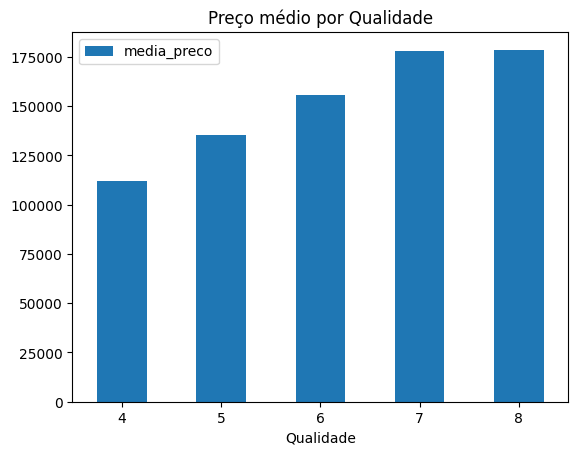

In [20]:
#Como a Qualidade interfere no valor do imóvel?
qualidade_preco = df.groupby("Qualidade").agg(media_preco = ("Preco","mean")).reset_index()
qualidade_preco["Qualidade"] = qualidade_preco["Qualidade"]
qualidade_preco.plot(x = "Qualidade", y = "media_preco", kind = "bar", title = "Preço médio por Qualidade")
plt.xticks(rotation = 360);

/tmp/ipython-input-21-4126010211.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=tabela_qualidade, y='mean', x=tabela_qualidade.Qualidade, palette='mako')


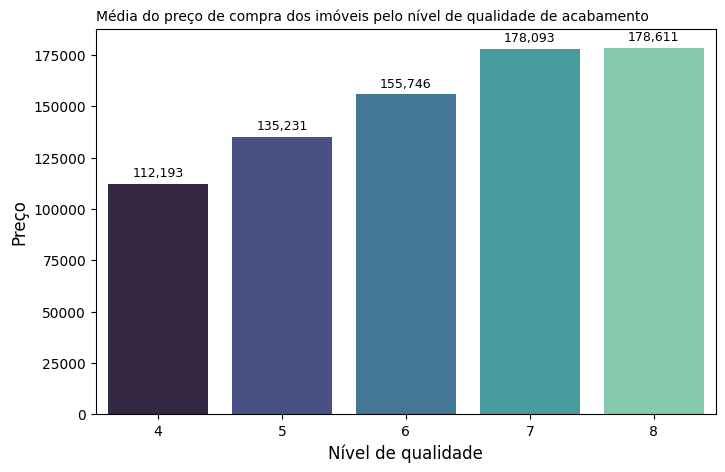

In [21]:
barplot = sns.barplot(data=tabela_qualidade, y='mean', x=tabela_qualidade.Qualidade, palette='mako')
# Tamanho da figura
barplot.figure.set_size_inches(8, 5)
# Título e rótulos
barplot.set_title('Média do preço de compra dos imóveis pelo nível de qualidade de acabamento', loc='left', fontsize=10)
barplot.set_ylabel('Preço', fontsize=12)
barplot.set_xlabel('Nível de qualidade', fontsize=12)
# Adicionando os valores numéricos nas barras
for i, valor in enumerate(tabela_qualidade['mean']):
    barplot.text(i, valor + 2000, f'{valor:,.0f}', ha='center', va='bottom', fontsize=9)

plt.show()

##### Esses dois gráficos acima são os mesmos, porém vendo a semelhança dos níveis 7 e 8 foi viável trazer esse outro gráfico para apresentar que mesmo com os valores próximos no nível de qualidade 7 e 8 o nível mais alto ainda tem o maior valor, dessa forma, ainda mantemos a resposta que sim quanto mais alto o nível de qualidade do imóvel maior o valor.


In [22]:
qualidade_preco.describe().round(2)

,Qualidade,media_preco
count,5.00,5.00
mean,6.00,151974.98
std,1.58,28586.71
min,4.00,112193.29
25%,5.00,135231.06
50%,6.00,155746.40
75%,7.00,178093.03
max,8.00,178611.11


/tmp/ipython-input-23-1407783029.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data = df, x = 'Qualidade', y = 'Preco', width = 0.5, palette = 'mako')


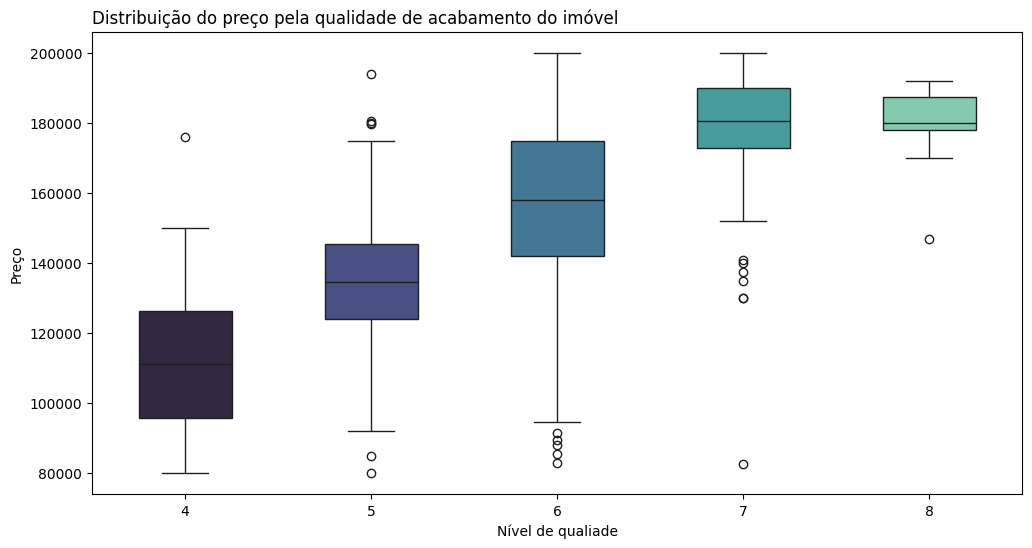

In [23]:
boxplot = sns.boxplot(data = df, x = 'Qualidade', y = 'Preco', width = 0.5, palette = 'mako')
boxplot.figure.set_size_inches(12,6)
boxplot.set_title('Distribuição do preço pela qualidade de acabamento do imóvel',
                  loc = 'left')
boxplot.set_xlabel('Nível de qualiade')
boxplot.set_ylabel('Preço');

##### Observa-se uma relação positiva clara entre a qualidade do acabamento e o preço final do imóvel. À medida que o nível de qualidade aumenta, o valor médio dos imóveis também cresce de forma consistente. Como mostrado no gráfico de boxplot, imóveis com maior qualidade apresentam não apenas preços médios mais elevados, mas também uma distribuição de preços mais alta e concentrada, indicando que a qualidade é um fator determinante no valor de mercado dos imóveis.


* ##     5.4. ANÁLISE DA COLUNA (AnoConstrucao)

#### Imóveis mais novos possuem preços mais elevados?

In [24]:
# Tratando a coluna Ano de Construção:
df["AnoConstrucao"].value_counts()

,count
AnoConstrucao,
2004,27
2005,25
1976,23
1959,21
2003,20
...,...
1981,2
1991,2
1942,2


In [25]:
anocostrucao_preco = df.groupby("AnoConstrucao").agg(media_preco = ("Preco","mean")).reset_index().round(2)
anocostrucao_preco["AnoConstrucao"] = anocostrucao_preco["AnoConstrucao"]
anocostrucao_preco.head()

,AnoConstrucao,media_preco
0,1940,119454.55
1,1941,125250.00
2,1942,162000.00
3,1945,110875.00
4,1946,118000.00


<Axes: xlabel='AnoConstrucao', ylabel='media_preco'>

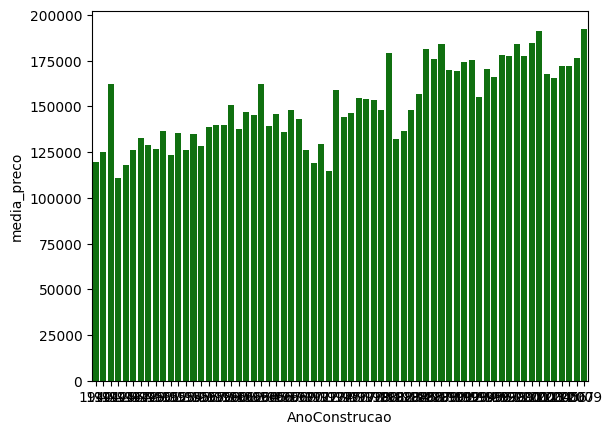

In [26]:
anocostrucao_preco = df.groupby("AnoConstrucao").agg(media_preco = ("Preco","mean")).reset_index().round(2)
anocostrucao_preco["AnoConstrucao"] = anocostrucao_preco["AnoConstrucao"]
sns.barplot(data = anocostrucao_preco, x="AnoConstrucao", y= "media_preco", color = "green")

### Visto que o gráfico ficou bem poluído iremos tentar uma tratativa diferente.

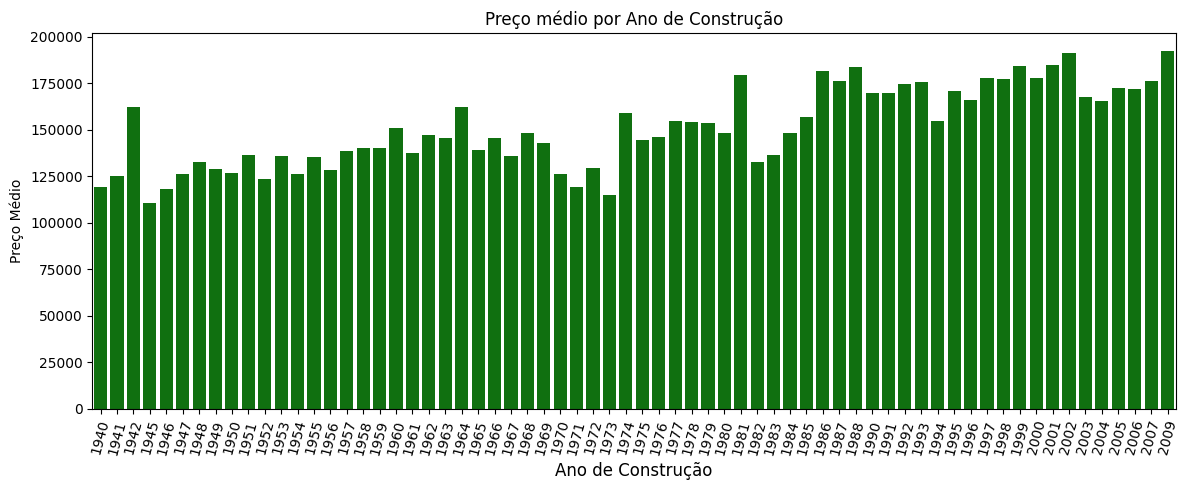

In [27]:
plt.figure(figsize=(12,5))
media_preco_ano = df.groupby("AnoConstrucao").agg(media_preco = ("Preco","mean")).reset_index()
sns.barplot(data = media_preco_ano, x="AnoConstrucao", y= "media_preco", color = "green")
plt.title("Preço médio por Ano de Construção")
plt.xlabel("Ano de Construção", fontsize = 12)
plt.ylabel("Preço Médio")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

### Ainda analisando o gráfico vemos que ficou muito poluído, dessa forma iremos realizar uma separação por década para uma melhor visualização.

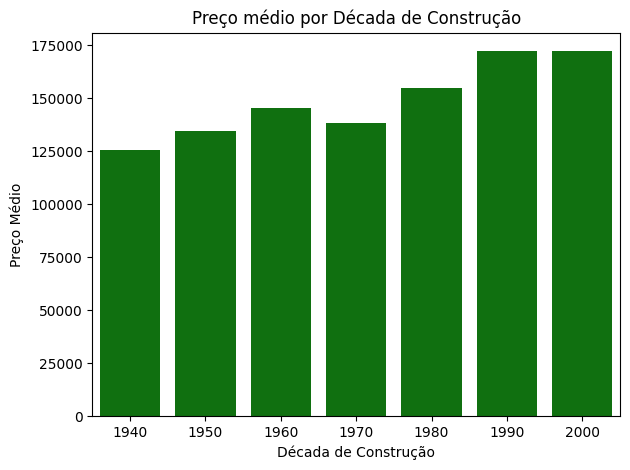

In [28]:
df['DecadaConstrucao'] = (df['AnoConstrucao'] // 10) * 10
media_preco_decada = df.groupby("DecadaConstrucao").agg(media_preco = ("Preco","mean")).reset_index()
sns.barplot(data = media_preco_decada, x="DecadaConstrucao", y= "media_preco", color = "green")
plt.title("Preço médio por Década de Construção")
plt.xlabel("Década de Construção")
plt.ylabel("Preço Médio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
# O primeiro está com a variação NaN pois não tem valores anteriores para sua comparação.
media_preco_decada = media_preco_decada.sort_values("DecadaConstrucao").round(2)
media_preco_decada["variacao_%"] = media_preco_decada["media_preco"].pct_change().round(4) * 100
media_preco_decada

,DecadaConstrucao,media_preco,variacao_%
0,1940,125406.38,NaN
1,1950,134285.52,7.08
2,1960,145442.11,8.31
3,1970,138318.96,-4.90
4,1980,154651.43,11.81
5,1990,172057.14,11.25
6,2000,172183.47,0.07


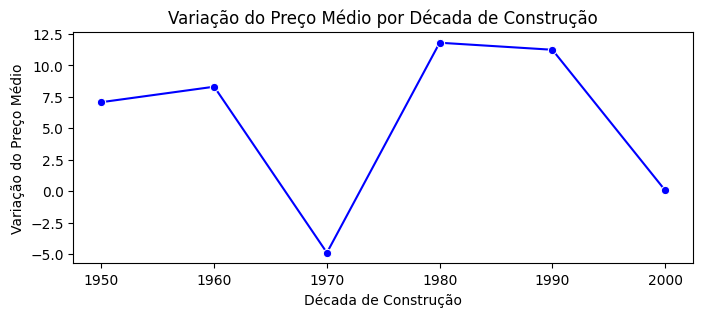

In [30]:
plt.figure(figsize=(8, 3))
sns.lineplot(data=media_preco_decada, x="DecadaConstrucao", y="variacao_%", marker="o", color="blue")
plt.title("Variação do Preço Médio por Década de Construção")
plt.xlabel("Década de Construção")
plt.ylabel("Variação do Preço Médio")
plt.xticks(rotation=0)
plt.show()

##### Com base na tabela e no gráfico apresentados, é possível observar que, ao longo das décadas, houve uma tendência geral de aumento no preço médio dos imóveis, com exceção da década de 1970. Nesse período, ocorreu uma queda de 4,90% em relação à década anterior, sendo a única variação negativa registrada. Já a década de 1980 apresentou o maior crescimento percentual, com uma valorização de 11,81%, indicando uma recuperação significativa após a queda anterior. Na década de 1990, a alta continuou, com um aumento de 11,25%, porém, entre as décadas de 1990 e 2000, a variação foi quase nula, registrando apenas 0,07%, o que demonstra uma estabilização nos preços médios dos imóveis nesse intervalo. O gráfico reforça visualmente essas oscilações, tornando evidente a queda nos anos 1970, o pico de valorização na década de 1980 e a estagnação mais recente.


* ##     5.5. ANÁLISE DA COLUNA (Zona)
  *   Zona: Classificação da zona de venda

        * RL =	Zona residencial de baixa densidade / Low-density residential zone
        * RM =	Zona residencial de média densidade / Medium-density residential zone

---



#### Imóveis situados em regiões de densidade populacional média têm preços mais altos?

In [31]:
#Tratando a Coluna Zona
df["Zona"].value_counts()

,count
Zona,
RL,555
RM,74


#### PORCENTAGEM POR ZONA

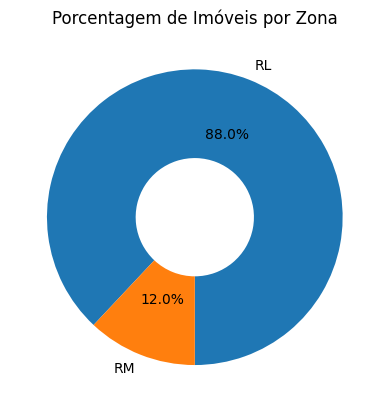

In [32]:
porcentagem_zona = df["Zona"].value_counts(normalize = True).round(2) * 100
fig, ax = plt.subplots()
ax.pie(porcentagem_zona, labels=porcentagem_zona.index, autopct='%1.1f%%', startangle=270, wedgeprops={'width':0.6})
ax.set_title("Porcentagem de Imóveis por Zona")
plt.show()

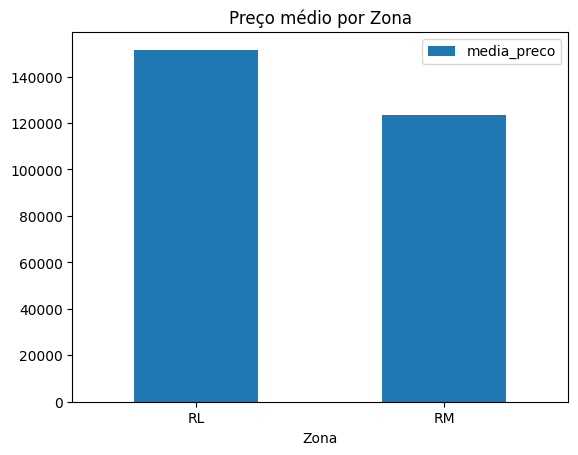

In [33]:
zona_preco = df.groupby("Zona").agg(media_preco = ("Preco","mean")).reset_index()
zona_preco["Zona"] = zona_preco["Zona"]
zona_preco.plot(x = "Zona", y = "media_preco",kind = "bar", title = "Preço médio por Zona")
plt.xticks(rotation = 360);

/tmp/ipython-input-34-4277351487.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df, y = 'Preco', x = 'Zona', palette = 'mako')


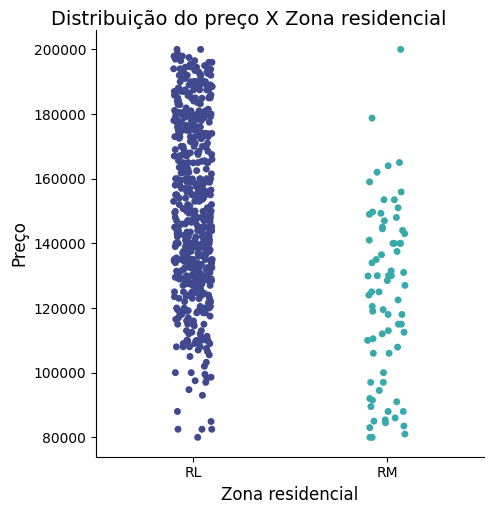

In [34]:
sns.catplot(data = df, y = 'Preco', x = 'Zona', palette = 'mako')
plt.suptitle('Distribuição do preço X Zona residencial', y = 1.01, x = 0.50, fontsize = 14)
plt.ylabel('Preço', fontsize = 12)
plt.xlabel('Zona residencial', fontsize = 12);

/tmp/ipython-input-35-2300138229.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='Zona', y='Preco', palette='dark')


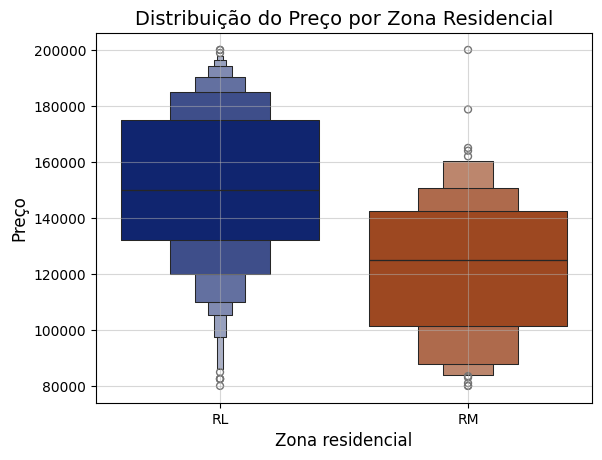

In [35]:
sns.boxenplot(data=df, x='Zona', y='Preco', palette='dark')
plt.title('Distribuição do Preço por Zona Residencial', fontsize=14)
plt.xlabel('Zona residencial', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

##### Os dados analisados indicam que os imóveis situados em áreas residenciais de baixa densidade geralmente têm valores de compra mais altos do que aqueles em zonas de média densidade. Aproximadamente 75% desses imóveis superam os 132.000 dólares, o que evidencia uma tendência de preços mais elevados nesse tipo de região. Essa diferença também se reflete na média geral dos preços por zona, sendo mais alta nas áreas de baixa densidade. O que normalmente é mais comum, um local com uma quantidade menor de população, mais reservado, tem valores maiores.




* ##     5.6. ANÁLISE DA COLUNA (Banheiros)

#### Quanto maior o número de banheiros, maior é o preço do imóvel?

In [36]:
#Tratando a coluna Banheiro
df["Banheiros"].value_counts()

,count
Banheiros,
1,396
2,233


In [37]:
df["Banheiros"].describe()

,Banheiros
count,629.000000
mean,1.370429
std,0.483304
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


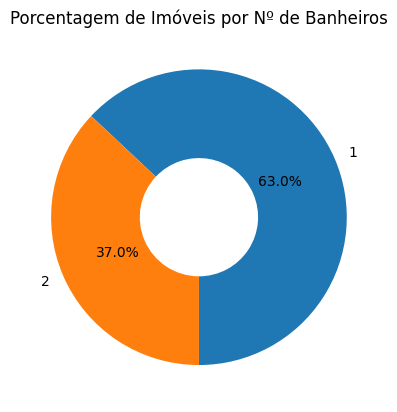

In [38]:
porcentagem_banheiro = df["Banheiros"].value_counts(normalize = True).round(2) * 100
fig, ax = plt.subplots()
ax.pie(porcentagem_banheiro, labels=porcentagem_banheiro.index, autopct='%1.1f%%', startangle=270, wedgeprops={'width':0.6})
ax.set_title("Porcentagem de Imóveis por Nº de Banheiros")
plt.show()

#### Nessa análise feita acima conseguimos ver que a maioria dos imóveis possuem apenas 1 banheiro


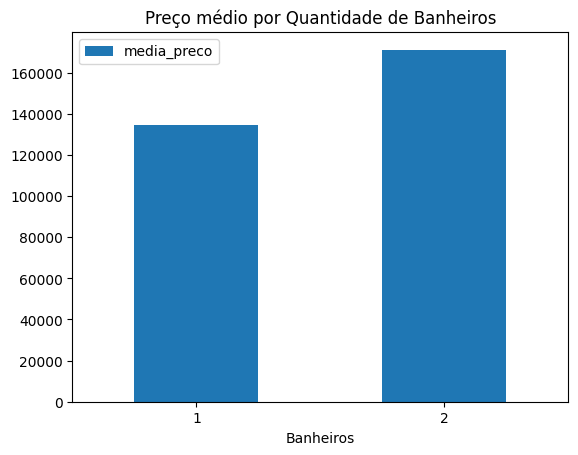

In [39]:
banheiros_preco = df.groupby("Banheiros").agg(media_preco = ("Preco","mean")).reset_index()
banheiros_preco["Banheiros"] = banheiros_preco["Banheiros"]
banheiros_preco.plot(x = "Banheiros", y = "media_preco", kind = "bar", title = "Preço médio por Quantidade de Banheiros")
plt.xticks(rotation = 360);

/tmp/ipython-input-40-2268375994.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=banheiros_preco, x="Banheiros", y="media_preco", palette="Blues_d")


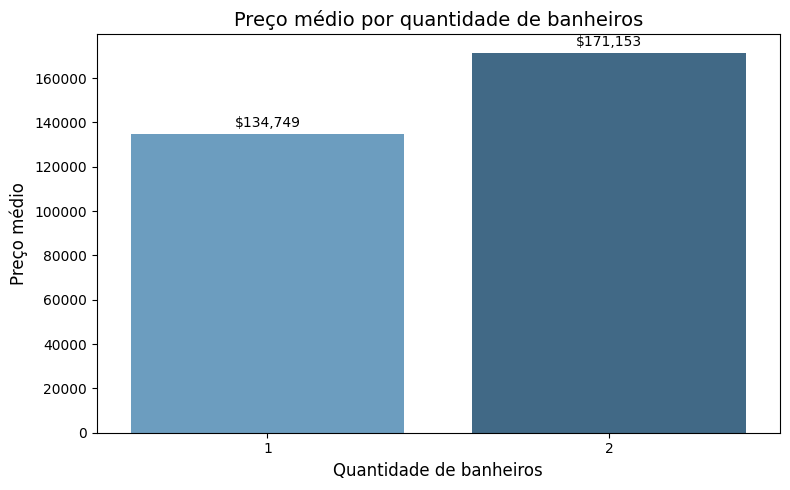

In [40]:
banheiros_preco = df.groupby("Banheiros").agg(media_preco=("Preco", "mean")).reset_index()

# Criar gráfico
plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=banheiros_preco, x="Banheiros", y="media_preco", palette="Blues_d")

# Adicionar valores numéricos nas barras
for i, valor in enumerate(banheiros_preco["media_preco"]):
    barplot.text(i, valor + 2000, f"${valor:,.0f}", ha='center', va='bottom', fontsize=10)

# Título e eixos
plt.title("Preço médio por quantidade de banheiros", fontsize=14)
plt.xlabel("Quantidade de banheiros", fontsize=12)
plt.ylabel("Preço médio", fontsize=12)
plt.tight_layout()
plt.show()

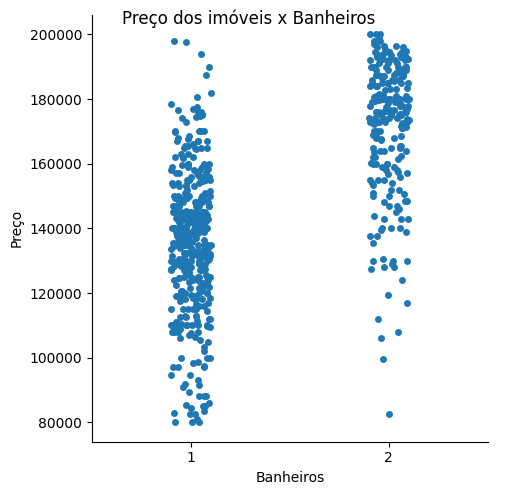

In [41]:
catplot = sns.catplot(data = df, x = 'Banheiros', y = 'Preco')
plt.suptitle('Preço dos imóveis x Banheiros')
plt.ylabel('Preço')
plt.xlabel('Banheiros');

/tmp/ipython-input-42-514547272.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='Banheiros', y='Preco', palette='dark')


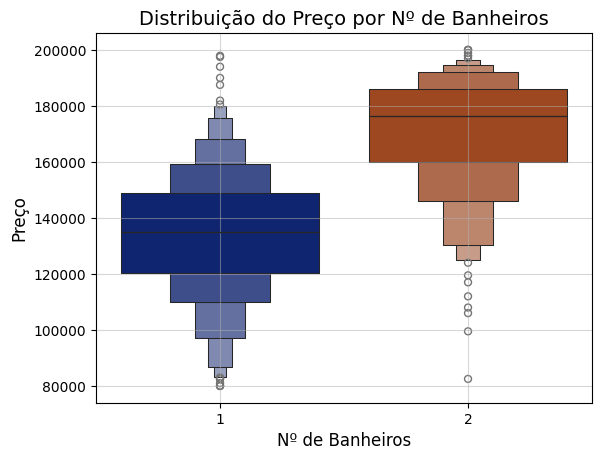

In [42]:
sns.boxenplot(data=df, x='Banheiros', y='Preco', palette='dark')
plt.title('Distribuição do Preço por Nº de Banheiros', fontsize=14)
plt.xlabel('Nº de Banheiros', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

##### A partir dos gráficos acima podemos concluir que existe mais de 60% de imóveis com apenas um banheiro e o restante possuem 2 banheiros, e podemos concluir também que as residências com dois banheiros tem uma média de pelo menos 35000 mais caro que os imóveis com apenas 1 banheiro.


* ##     5.7. ANÁLISE DA COLUNA (Garagem)

#### A quantidade de vagas de garagem influencia no valor do imóvel?

In [43]:
# Tratando coluna Garagem
df["Garagem"].value_counts()

,count
Garagem,
2,392
1,207
0,23
3,7


In [44]:
# Qual preço médio por quantidade de garagens?
garagem_preco = df.groupby("Garagem").agg(media_preco = ("Preco","mean")).reset_index()
garagem_preco = garagem_preco.rename(columns = {"media_preco": "Preço médio x garagem"})
garagem_preco = garagem_preco.round(2)
garagem_preco

,Garagem,Preço médio x garagem
0,0,106771.74
1,1,128999.19
2,2,160328.42
3,3,176028.57


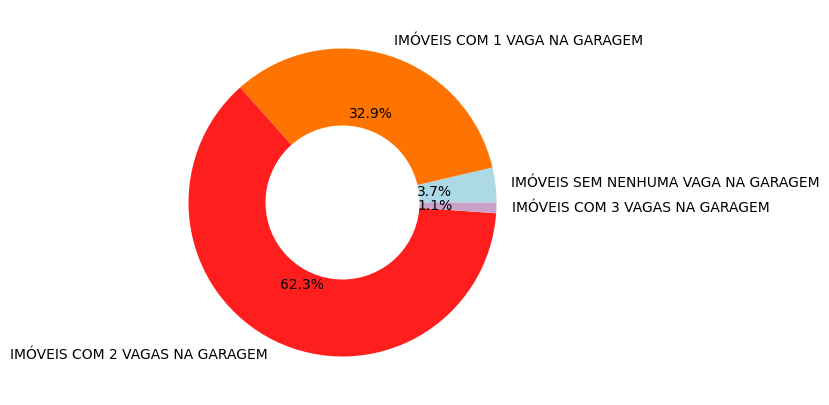

In [45]:
legenda = ['IMÓVEIS SEM NENHUMA VAGA NA GARAGEM', 'IMÓVEIS COM 1 VAGA NA GARAGEM',
           'IMÓVEIS COM 2 VAGAS NA GARAGEM', 'IMÓVEIS COM 3 VAGAS NA GARAGEM']
porcentagem_nenhuma_vaga = df.Garagem.value_counts(normalize = True)[0] * 100
porcentagem_1_vaga = df.Garagem.value_counts(normalize = True)[1] * 100
porcentagem_2_vagas = df.Garagem.value_counts(normalize = True)[2] * 100
porcentagem_3_vagas = df.Garagem.value_counts(normalize = True)[3] * 100
dados_garagem = [porcentagem_nenhuma_vaga, porcentagem_1_vaga, porcentagem_2_vagas, porcentagem_3_vagas]
cores_grafico = ['#add8e6', '#ff7300', '#ff1e1e', '#c8a2c8']

# construindo gráfico de pizza
plt.figure(figsize=(12, 5))
wedges, texts, autotexts = plt.pie(dados_garagem, autopct='%1.1f%%', pctdistance=0.6,
                                   colors=cores_grafico, labels=legenda, shadow=False)
# Transformando em rosquinha
centro = plt.Circle((0,0), 0.50, fc='white')
plt.gca().add_artist(centro)

plt.show()

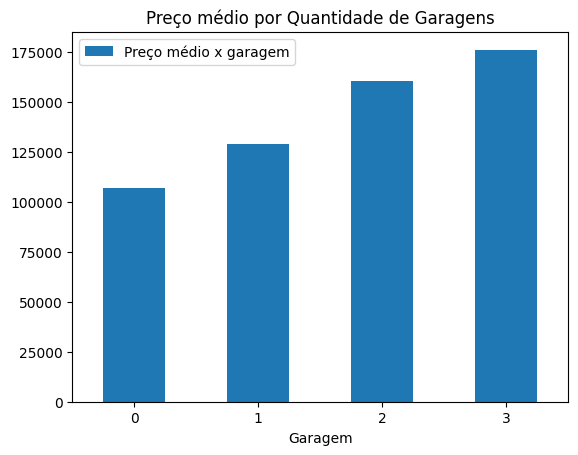

In [46]:
garagem_preco.plot(x = "Garagem", y = "Preço médio x garagem", kind = "bar", title = "Preço médio por Quantidade de Garagens")
plt.xticks(rotation = 0);

/tmp/ipython-input-47-2222207896.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=garagem_preco, x="Garagem", y="media_preco", palette="Blues_d")


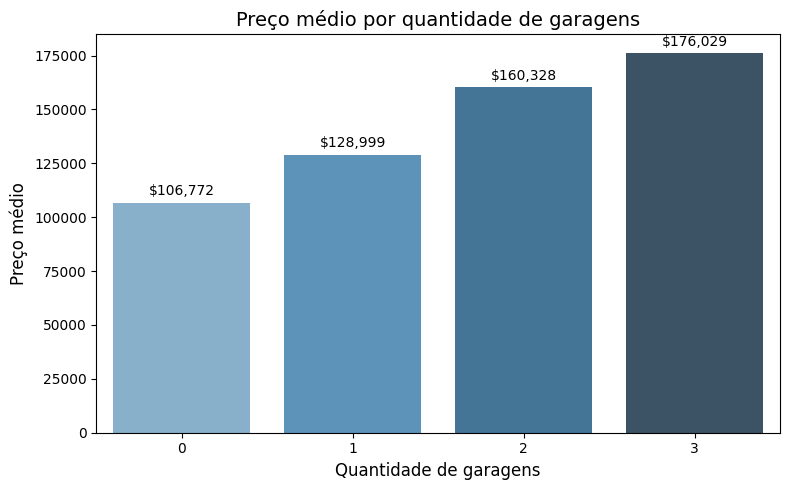

In [47]:
garagem_preco = df.groupby("Garagem").agg(media_preco=("Preco", "mean")).reset_index()

# Criar gráfico
plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=garagem_preco, x="Garagem", y="media_preco", palette="Blues_d")

# Adicionar valores numéricos nas barras
for i, valor in enumerate(garagem_preco["media_preco"]):
    barplot.text(i, valor + 2000, f"${valor:,.0f}", ha='center', va='bottom', fontsize=10)

# Título e eixos
plt.title("Preço médio por quantidade de garagens", fontsize=14)
plt.xlabel("Quantidade de garagens", fontsize=12)
plt.ylabel("Preço médio", fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-48-22105865.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data = df, x = 'Garagem', y = 'Preco', width = 0.5, palette = 'mako')


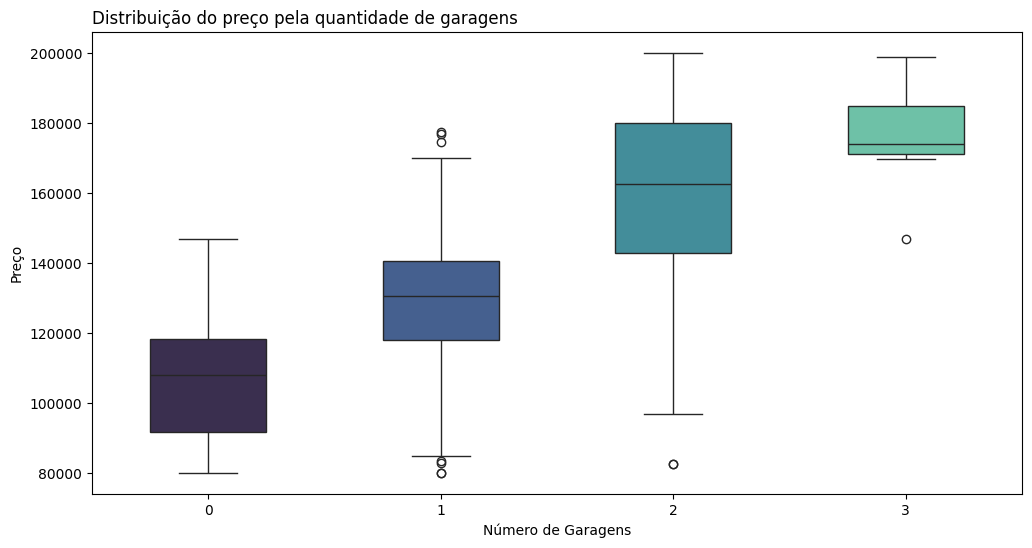

In [48]:
boxplot = sns.boxplot(data = df, x = 'Garagem', y = 'Preco', width = 0.5, palette = 'mako')
boxplot.figure.set_size_inches(12,6)
boxplot.set_title('Distribuição do preço pela quantidade de garagens',
                  loc = 'left')
boxplot.set_xlabel('Número de Garagens')
boxplot.set_ylabel('Preço');

##### Após analisar os dados acima podemos concluir que mais da metade dos imóveis possuem duas garagens e é válido ressaltar que é mais comum das casas não ter nenhuma vaga de garagem do que ter 3 vagas. Além disso podemos comentar que quanto mais garagens mais alto fica o valor.


* ##     5.8. ANÁLISE DA COLUNA (QualidadeAquecimento)

#### Imóveis com aquecimento de melhor qualidade tendem a custar mais?

 * Ex	Excelente
 * Gd	Bom
 * TA	Mediano
 * Fa	Aceitável

In [49]:
df.head()

,Id,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco,DecadaConstrucao
0,1,RL,9600,6,1976,Ex,2,3,4,6,1,2,181500,1970
1,2,RL,14115,5,1993,Ex,1,1,2,5,0,2,143000,1990
2,3,RL,11200,5,1965,Ex,1,3,4,5,0,1,129500,1960
3,4,RL,12968,5,1962,TA,1,2,3,4,0,1,144000,1960
4,5,RL,10920,6,1960,TA,1,2,3,5,1,1,157000,1960


In [50]:
#Analisando a coluna QualidadeAquecimento
df["QualidadeAquecimento"].value_counts()

,count
QualidadeAquecimento,
Ex,255
TA,246
Gd,116
Fa,12


/tmp/ipython-input-51-3907977936.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentagem_qa_ex = df.QualidadeAquecimento.value_counts(normalize = True)[0] * 100
/tmp/ipython-input-51-3907977936.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentagem_qa_gd = df.QualidadeAquecimento.value_counts(normalize = True)[1] * 100
/tmp/ipython-input-51-3907977936.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentagem_q

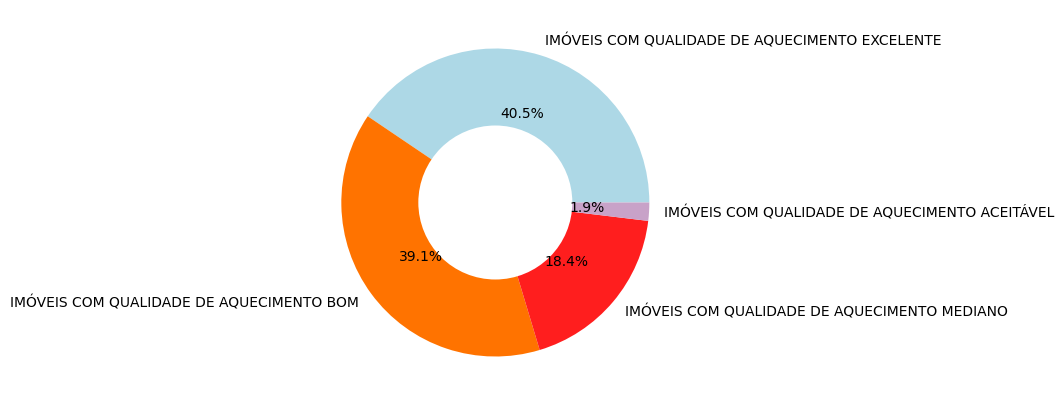

In [51]:
legenda = ['IMÓVEIS COM QUALIDADE DE AQUECIMENTO EXCELENTE', 'IMÓVEIS COM QUALIDADE DE AQUECIMENTO BOM',
           'IMÓVEIS COM QUALIDADE DE AQUECIMENTO MEDIANO', 'IMÓVEIS COM QUALIDADE DE AQUECIMENTO ACEITÁVEL']
porcentagem_qa_ex = df.QualidadeAquecimento.value_counts(normalize = True)[0] * 100
porcentagem_qa_gd = df.QualidadeAquecimento.value_counts(normalize = True)[1] * 100
porcentagem_qa_ta = df.QualidadeAquecimento.value_counts(normalize = True)[2] * 100
porcentagem_qa_fa = df.QualidadeAquecimento.value_counts(normalize = True)[3] * 100
dados_qualidadeaquecimento = [porcentagem_qa_ex, porcentagem_qa_gd, porcentagem_qa_ta, porcentagem_qa_fa]
cores_grafico = ['#add8e6', '#ff7300', '#ff1e1e', '#c8a2c8']

# construindo gráfico de pizza
plt.figure(figsize=(12, 5))
wedges, texts, autotexts = plt.pie(dados_qualidadeaquecimento, autopct='%1.1f%%', pctdistance=0.6,
                                   colors=cores_grafico, labels=legenda, shadow=False)
# Transformando em rosquinha
centro = plt.Circle((0,0), 0.50, fc='white')
plt.gca().add_artist(centro)
plt.show()

In [52]:
aquecimento_preco = df.groupby("QualidadeAquecimento").agg("Preco").describe()
aquecimento_preco.reset_index()
aquecimento_preco = aquecimento_preco.round(2)
aquecimento_preco

,count,mean,std,min,25%,50%,75%,max
QualidadeAquecimento,,,,,,,,
Ex,255.0,157942.84,26538.32,82500.0,138250.0,159000.0,180750.0,200000.0
Fa,12.0,147570.83,24811.48,120000.0,128587.5,140500.0,163875.0,197900.0
Gd,116.0,150893.90,27549.92,81000.0,132875.0,154250.0,175250.0,192000.0
TA,246.0,136949.43,26054.89,80000.0,120125.0,135730.0,154125.0,197900.0


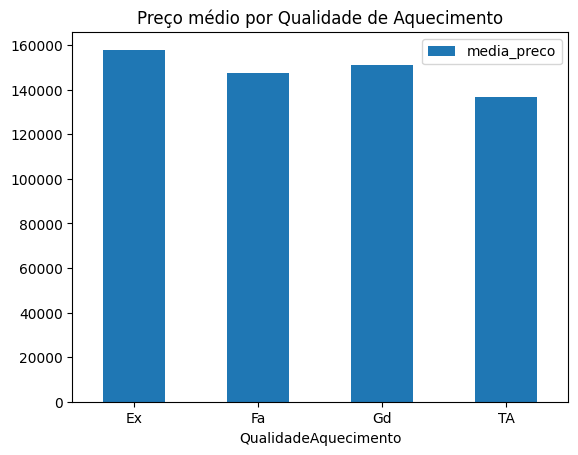

In [53]:
aquecimento_preco_medio = df.groupby("QualidadeAquecimento").agg(media_preco = ("Preco","mean")).reset_index()
aquecimento_preco_medio = aquecimento_preco_medio.round(2)
aquecimento_preco_medio.plot(x = "QualidadeAquecimento", y = "media_preco", kind = "bar", title = "Preço médio por Qualidade de Aquecimento")
plt.xticks(rotation = 0);

##### Analisando o gráfico acima não conseguimos tirar tantas conclusões dessa forma iremos implantar os valores em cima da barra para ficar mais facil a visualização.


/tmp/ipython-input-54-2795028996.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=qualidade_aquecimento_preco, x="QualidadeAquecimento", y="media_preco", palette="Blues_d")


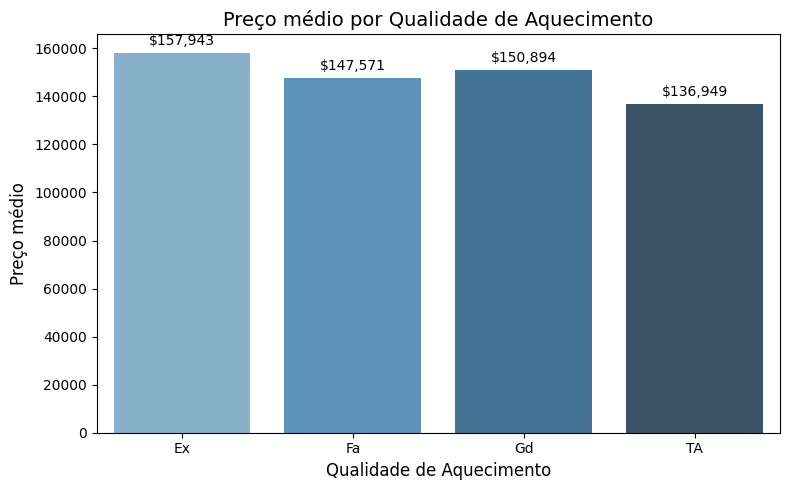

In [54]:
qualidade_aquecimento_preco = df.groupby("QualidadeAquecimento").agg(media_preco=("Preco", "mean")).reset_index()

# Criar gráfico
plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=qualidade_aquecimento_preco, x="QualidadeAquecimento", y="media_preco", palette="Blues_d")

# Adicionar valores numéricos nas barras
for i, valor in enumerate(qualidade_aquecimento_preco["media_preco"]):
    barplot.text(i, valor + 2000, f"${valor:,.0f}", ha='center', va='bottom', fontsize=10)

# Título e eixos
plt.title("Preço médio por Qualidade de Aquecimento", fontsize=14)
plt.xlabel("Qualidade de Aquecimento", fontsize=12)
plt.ylabel("Preço médio", fontsize=12)
plt.tight_layout()
plt.show()

##### A análise dos dados acima mostra que a maioria dos imóveis avaliados apresenta qualidade de aquecimento excelente, correspondendo a 40,5% do total. Em seguida, estão os imóveis com qualidade de aquecimento boa (39,1%), mediana (18,4%) e, por fim, aceitável (1,9%). Essa distribuição evidencia que grande parte dos imóveis conta com sistemas de aquecimento de alto padrão. Além disso, observando os valores médios dos preços dos imóveis em relação à qualidade do aquecimento, nota-se uma relação direta entre essas duas variáveis. Imóveis com aquecimento excelente possuem o maior valor médio, cerca de 157.943, seguidos por aqueles com aquecimento bom (150.894), aceitável (147.571) e mediano (136.949). Esses dados indicam que, quanto melhor a qualidade do aquecimento, maior tende a ser o valor médio do imóvel, sugerindo que esse fator influencia diretamente na valorização da propriedade.


* ##     5.9. ANÁLISE DA COLUNA (Quartos_t1 / Quartos_t2)

In [55]:
df['Quartos_t1'].value_counts().reset_index()

,Quartos_t1,count
0,3,434
1,2,171
2,1,24


In [56]:
df['Quartos_t2'].value_counts().reset_index()

,Quartos_t2,count
0,4,434
1,3,171
2,2,24


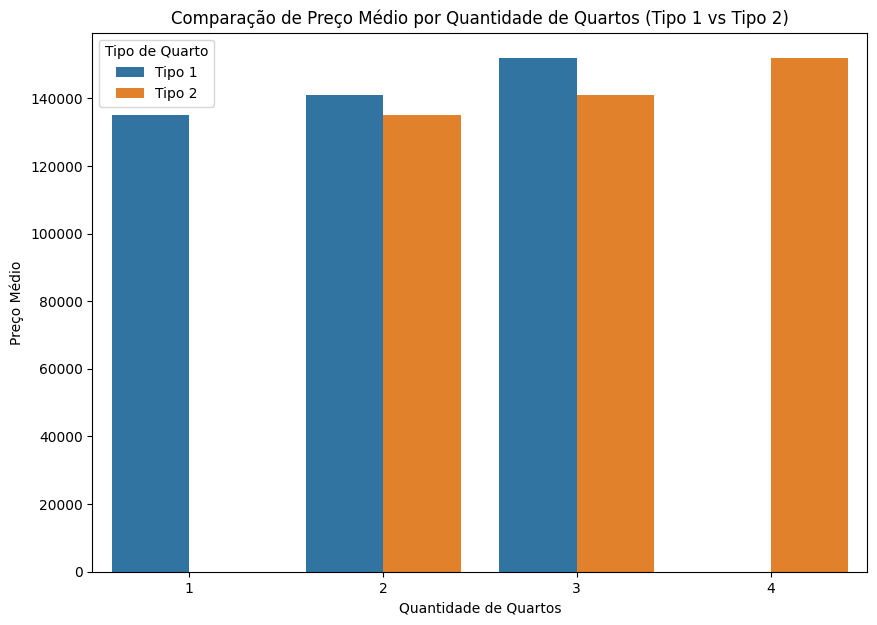

In [57]:
# Agrupar os dois tipos
media_quarto1 = df.groupby("Quartos_t1").agg(media_preco=("Preco", "mean")).reset_index()
media_quarto1["tipo_quarto"] = "Tipo 1"
media_quarto1.rename(columns={"Quartos_t1": "quartos"}, inplace=True)
media_quarto2 = df.groupby("Quartos_t2").agg(media_preco=("Preco", "mean")).reset_index()
media_quarto2["tipo_quarto"] = "Tipo 2"
media_quarto2.rename(columns={"Quartos_t2": "quartos"}, inplace=True)

# Juntar os dois DataFrames
comparacao_quartos = pd.concat([media_quarto1, media_quarto2])
plt.figure(figsize=(10, 7))
sns.barplot(data=comparacao_quartos, x="quartos", y="media_preco", hue="tipo_quarto")
plt.title("Comparação de Preço Médio por Quantidade de Quartos (Tipo 1 vs Tipo 2)")
plt.xlabel("Quantidade de Quartos")
plt.ylabel("Preço Médio")
plt.legend(title="Tipo de Quarto")
plt.show()

In [58]:
df['Quartos_t1'].describe()

,Quartos_t1
count,629.000000
mean,2.651828
std,0.551129
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [59]:
df['Quartos_t2'].describe()

,Quartos_t2
count,629.000000
mean,3.651828
std,0.551129
min,2.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,4.000000


##### Após a análise do gráfico e da tabela apresentados, é possível afirmar que não existem imóveis com apenas um quarto do tipo 2, assim como não há residências com quatro quartos do tipo 1. Além disso, ao compararmos os imóveis com dois ou três quartos  (categorias presentes em ambos os tipos) observamos que os imóveis com quartos do tipo 1 apresentam valores médios mais altos do que aqueles com quartos do tipo 2.


* ##     6.0. ANÁLISE DA COLUNA (Comodos)

In [60]:
tabela_comodos = df.groupby(['Comodos'])['Preco'].describe().round(2)
tabela_comodos = tabela_comodos.reset_index()
tabela_comodos

,Comodos,count,mean,std,min,25%,50%,75%,max
0,3,12.0,119141.67,31152.42,80000.0,85625.00,134000.0,144500.0,155900.0
1,4,49.0,122755.31,20691.75,80000.0,110000.00,124900.0,137000.0,187500.0
2,5,176.0,135972.86,24687.05,80000.0,118875.00,133000.0,150050.0,197500.0
3,6,247.0,152067.32,25364.77,82500.0,135000.00,151000.0,173000.0,200000.0
4,7,117.0,166461.67,23284.92,91500.0,153000.00,174000.0,182900.0,200000.0
5,8,28.0,172391.07,18401.76,131000.0,161951.25,177700.0,186875.0,200000.0


/tmp/ipython-input-61-4056244630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=comodos_preco, x="Comodos", y="media_preco", palette="Blues_d")


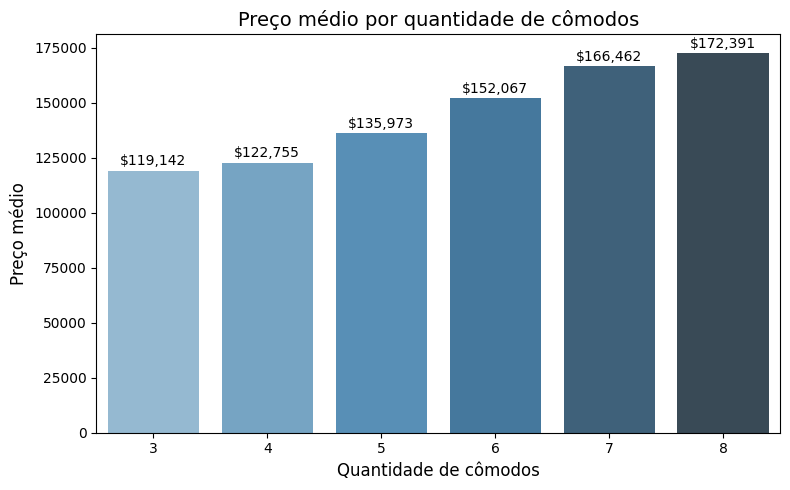

In [61]:
comodos_preco = df.groupby("Comodos").agg(media_preco=("Preco", "mean")).reset_index()
# Criar gráfico
plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=comodos_preco, x="Comodos", y="media_preco", palette="Blues_d")
# Adicionar valores numéricos nas barras (corrigido)
for bar in barplot.patches:
    altura = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    barplot.text(x, altura + 1000, f"${altura:,.0f}", ha='center', va='bottom', fontsize=10)
# Título e eixos
plt.title("Preço médio por quantidade de cômodos", fontsize=14)
plt.xlabel("Quantidade de cômodos", fontsize=12)
plt.ylabel("Preço médio", fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-62-3665049429.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data = df, x = 'Comodos', y = 'Preco', width = 0.5, palette = 'mako')


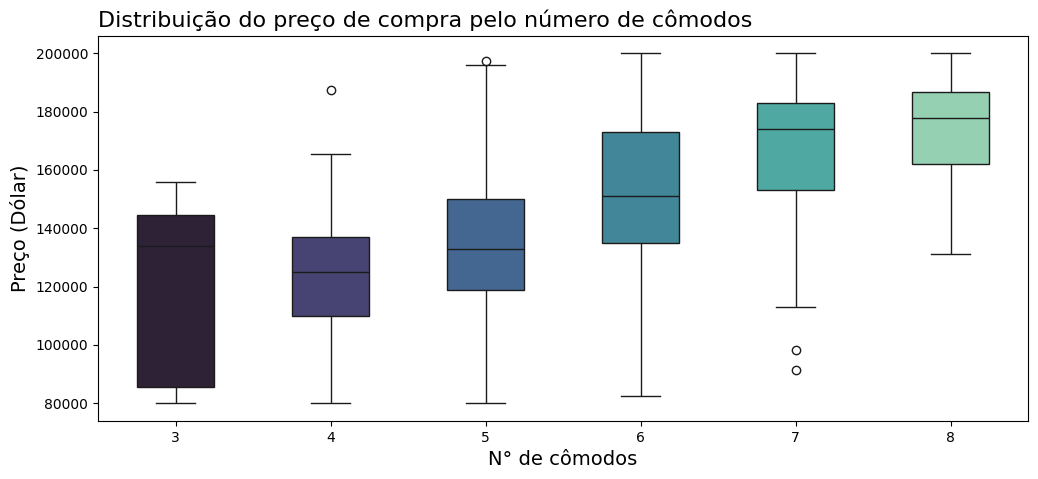

In [62]:
boxplot = sns.boxplot(data = df, x = 'Comodos', y = 'Preco', width = 0.5, palette = 'mako')
boxplot.figure.set_size_inches(12,5)
boxplot.set_title('Distribuição do preço de compra pelo número de cômodos', loc = 'left', fontsize = 16)
boxplot.set_xlabel('N° de cômodos', fontsize = 14)
boxplot.set_ylabel('Preço (Dólar)', fontsize = 14);

##### Ao analisar a tabela e os gráficos acima vemos que quanto maior o número de cômodos no imóvel mais alto o valor dele. Além disso, pela tabela, conseguimos conluir que imóveis com 3,4 ou 5 cômodos tem seu valor inicial de 80000 porém seus valores máximos podem chegar a mais de 150000. Outro tópico importante é ressaltar que dos 629 imóveis 247 possuem 6 cômodos, ou seja, quase 40% dos imóveis tem 6 cômodos.


* ##     6.1. ANÁLISE DA COLUNA (Lareiras)

In [63]:
df['Lareiras'].describe().reset_index().round(2)

,index,Lareiras
0,count,629.00
1,mean,0.52
2,std,0.60
3,min,0.00
4,25%,0.00
5,50%,0.00
6,75%,1.00
7,max,2.00


In [64]:
df['Lareiras'].value_counts().reset_index()

,Lareiras,count
0,0,340
1,1,254
2,2,35


In [65]:
df.head()

,Id,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco,DecadaConstrucao
0,1,RL,9600,6,1976,Ex,2,3,4,6,1,2,181500,1970
1,2,RL,14115,5,1993,Ex,1,1,2,5,0,2,143000,1990
2,3,RL,11200,5,1965,Ex,1,3,4,5,0,1,129500,1960
3,4,RL,12968,5,1962,TA,1,2,3,4,0,1,144000,1960
4,5,RL,10920,6,1960,TA,1,2,3,5,1,1,157000,1960


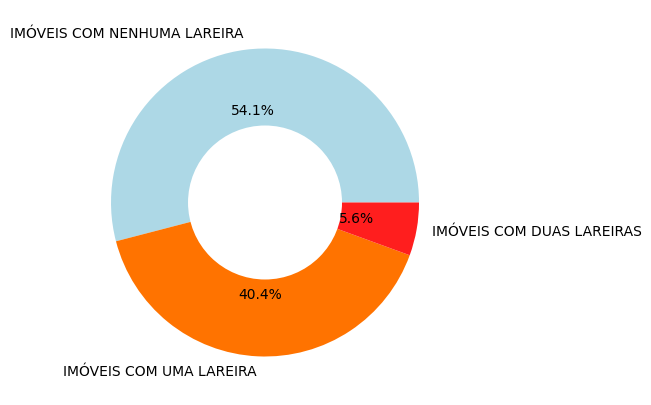

In [66]:
legenda = ['IMÓVEIS COM NENHUMA LAREIRA', 'IMÓVEIS COM UMA LAREIRA',
           'IMÓVEIS COM DUAS LAREIRAS']
porcentagem_lareira_0 = df.Lareiras.value_counts(normalize = True)[0] * 100
porcentagem_lareira_1 = df.Lareiras.value_counts(normalize = True)[1] * 100
porcentagem_lareira_2 = df.Lareiras.value_counts(normalize = True)[2] * 100
dados_lareira = [porcentagem_lareira_0, porcentagem_lareira_1, porcentagem_lareira_2]
cores_grafico = ['#add8e6', '#ff7300', '#ff1e1e', '#c8a2c8']

# construindo gráfico de pizza
plt.figure(figsize=(12, 5))
wedges, texts, autotexts = plt.pie(dados_lareira, autopct='%1.1f%%', pctdistance=0.6,
                                   colors=cores_grafico, labels=legenda, shadow=False)
# Transformando em rosquinha
centro = plt.Circle((0,0), 0.50, fc='white')
plt.gca().add_artist(centro)
plt.show()

In [67]:
tabela_lareira = df.groupby(['Lareiras'])['Preco'].describe().round(2)
tabela_lareira = tabela_lareira.reset_index()
tabela_lareira

,Lareiras,count,mean,std,min,25%,50%,75%,max
0,0,340.0,138437.43,27171.09,80000.0,121325.0,136500.0,153500.0,200000.0
1,1,254.0,160225.74,25036.83,82500.0,143000.0,165000.0,180000.0,197900.0
2,2,35.0,156384.57,21079.19,100000.0,146650.0,159000.0,168750.0,196000.0


/tmp/ipython-input-68-4278550486.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data = df, x = 'Lareiras', y = 'Preco', palette = 'mako')


Text(0, 0.5, 'Preço')

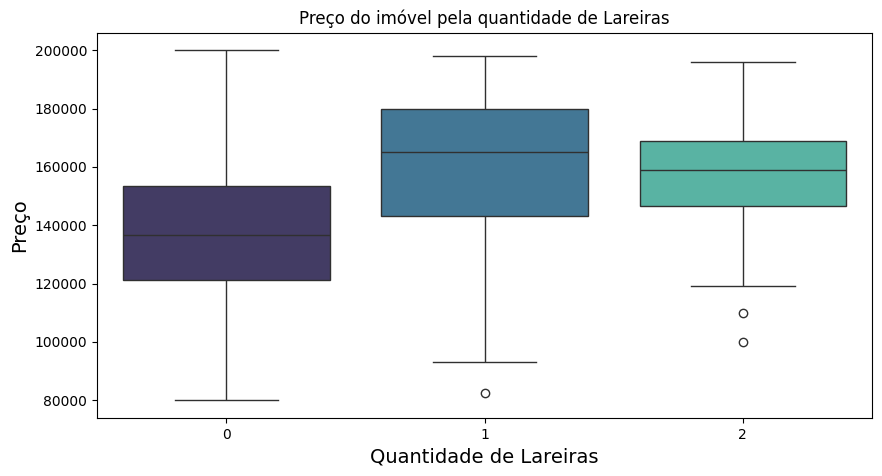

In [68]:
boxplot = sns.boxplot(data = df, x = 'Lareiras', y = 'Preco', palette = 'mako')
boxplot.figure.set_size_inches(10,5)
boxplot.set_title('Preço do imóvel pela quantidade de Lareiras', loc = 'center', fontsize = 12)
boxplot.set_xlabel('Quantidade de Lareiras', fontsize = 14)
boxplot.set_ylabel('Preço', fontsize = 14)

/tmp/ipython-input-69-1255412639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=lareira_preco, x="Lareiras", y="media_preco", palette="Blues_d")


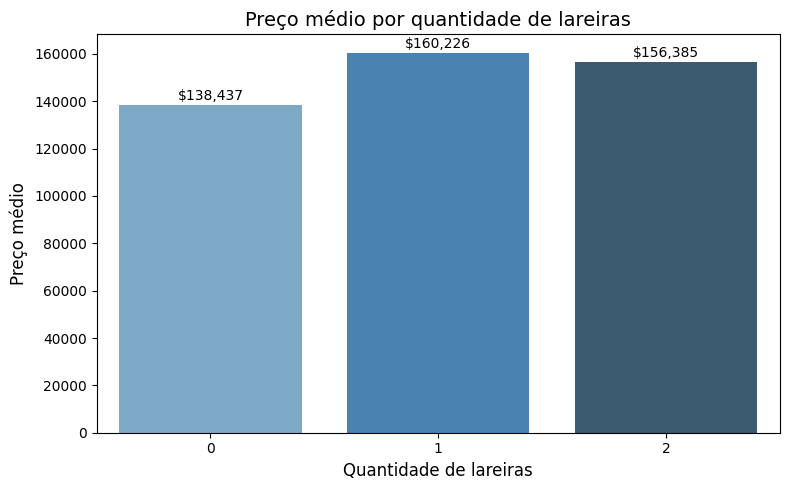

In [69]:
lareira_preco = df.groupby("Lareiras").agg(media_preco=("Preco", "mean")).reset_index()
# Criar gráfico
plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=lareira_preco, x="Lareiras", y="media_preco", palette="Blues_d")
# Adicionar valores numéricos nas barras (corrigido)
for bar in barplot.patches:
    altura = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    barplot.text(x, altura + 1000, f"${altura:,.0f}", ha='center', va='bottom', fontsize=10)
# Título e eixos
plt.title("Preço médio por quantidade de lareiras", fontsize=14)
plt.xlabel("Quantidade de lareiras", fontsize=12)
plt.ylabel("Preço médio", fontsize=12)
plt.tight_layout()
plt.show()

##### A partir das análises de tabela e gráficos acima, vemos que o imóvel pode ter nenhuma, uma ou duas lareiras. Sendo 54% do total sem nenhuma lareira, seguido de 40% com uma lareira e os 5,6% restantes com duas lareiras. Tendo em vista a alta quantidade de imóveis com 1 lareira, seu preço é o mais alto podendo chegar á 160000, seguindo para imóveis com 2 lareiras podendo chegar até 156000 e por fim a que não tem nenhuma lareira e mais comum nos imóveis, chegando até á 138000. Dessa forma podemos afirma que sim os valores dos imóveis podem mudar com a quantidade de lareiras da residência, mesmo que a diferença não seja tão alta com um valor de variação de aproximadamente 20000.


* #     7. Explorar as correlações entre as variáveis para entender suas relações

In [70]:
df.head()

,Id,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco,DecadaConstrucao
0,1,RL,9600,6,1976,Ex,2,3,4,6,1,2,181500,1970
1,2,RL,14115,5,1993,Ex,1,1,2,5,0,2,143000,1990
2,3,RL,11200,5,1965,Ex,1,3,4,5,0,1,129500,1960
3,4,RL,12968,5,1962,TA,1,2,3,4,0,1,144000,1960
4,5,RL,10920,6,1960,TA,1,2,3,5,1,1,157000,1960


In [71]:
df_numerico = df.drop(columns=['Id', 'Zona', 'QualidadeAquecimento'])
corr = df_numerico.corr()
corr

,Area,Qualidade,AnoConstrucao,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco,DecadaConstrucao
Area,1.000000,-0.028974,-0.164230,0.027095,0.334651,0.334651,0.246016,0.213599,0.113745,0.297947,-0.177791
Qualidade,-0.028974,1.000000,0.579509,0.588077,0.070104,0.070104,0.392761,0.260709,0.456741,0.656785,0.567168
AnoConstrucao,-0.164230,0.579509,1.000000,0.613079,-0.028868,-0.028868,0.199937,-0.031254,0.486783,0.558475,0.989381
Banheiros,0.027095,0.588077,0.613079,1.000000,0.150195,0.150195,0.455426,0.202611,0.479552,0.626393,0.601590
Quartos_t1,0.334651,0.070104,-0.028868,0.150195,1.000000,1.000000,0.564832,0.099971,0.026743,0.192015,-0.038486
Quartos_t2,0.334651,0.070104,-0.028868,0.150195,1.000000,1.000000,0.564832,0.099971,0.026743,0.192015,-0.038486
Comodos,0.246016,0.392761,0.199937,0.455426,0.564832,0.564832,1.000000,0.281535,0.273984,0.500864,0.187025
Lareiras,0.213599,0.260709,-0.031254,0.202611,0.099971,0.099971,0.281535,1.000000,0.159043,0.340914,-0.036458
Garagem,0.113745,0.456741,0.486783,0.479552,0.026743,0.026743,0.273984,0.159043,1.000000,0.596711,0.479816
Preco,0.297947,0.656785,0.558475,0.626393,0.192015,0.192015,0.500864,0.340914,0.596711,1.000000,0.538299


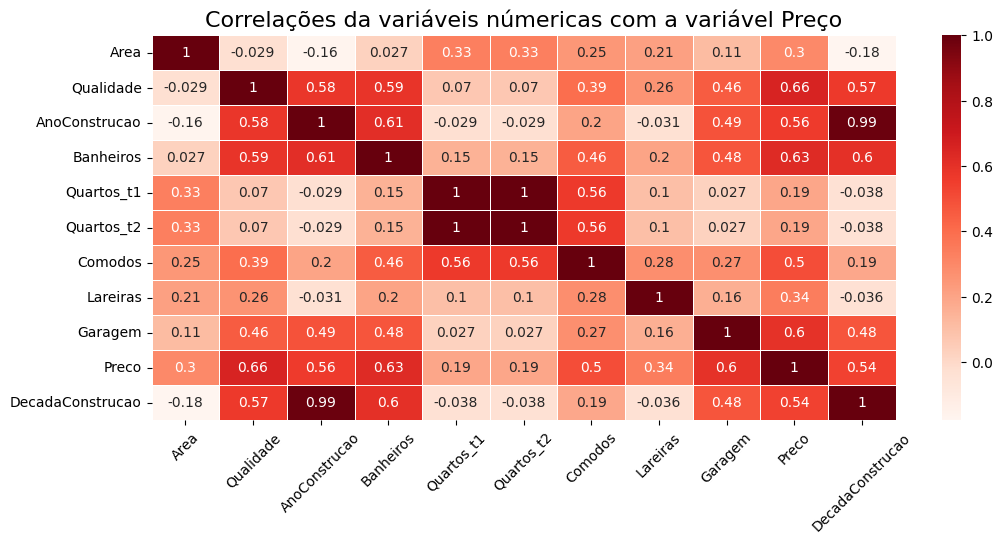

In [72]:
heatmap = sns.heatmap(corr, annot = True, linewidth = 0.5, cmap = 'Reds')
heatmap.figure.set_size_inches(12,5)
heatmap.set_title('Correlações da variáveis númericas com a variável Preço', fontsize = 16);
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45);

#### A partir do heatmap de correlação, percebe-se que as variáveis numéricas independentes que apresentam maior relação com a variável alvo são:


* ##### Área do imóvel ▶ 0,30
* ##### Qualidade de acabamento dos imóveis ▶ 0,66
* ##### Ano em que o imóvel foi construído ▶ 0,56
* ##### Quantidade de banheiros ▶ 0,63
* ##### Quantidade de Cômodos ▶ 0,50
* ##### Número de garagens no imóvel ▶ 0,60

#### Como podemos ver, eles apresentam uma corralação positiva.






In [73]:
#Função para o gráfico de dispersão
def dispersao(df, x, y, xlabel, ylabel, titulo, ajuste_x = 0.55, ajuste_y = 1.02):
    ax = sns.lmplot(data= df, x = x, y = y)
    ax.fig.set_size_inches(6,4)
    plt.suptitle(titulo, fontsize = 14, x = ajuste_x, y = ajuste_y)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)

* #     7.1 Gráfico de dispersão da variável Area

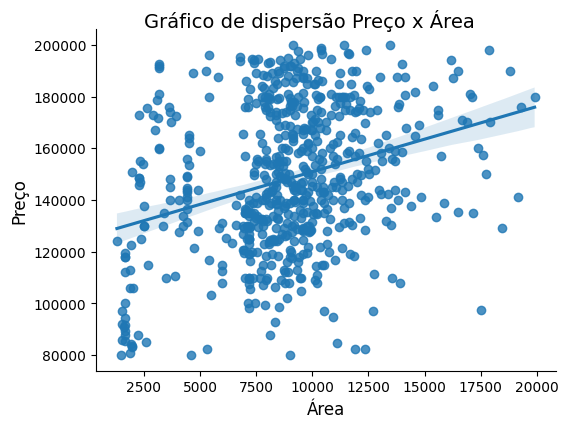

In [74]:
dispersao(df = df, x = 'Area', y = 'Preco', xlabel = 'Área',
                ylabel = 'Preço', titulo = 'Gráfico de dispersão Preço x Área')

* #     7.2 Gráfico de dispersão da variável Qualidade

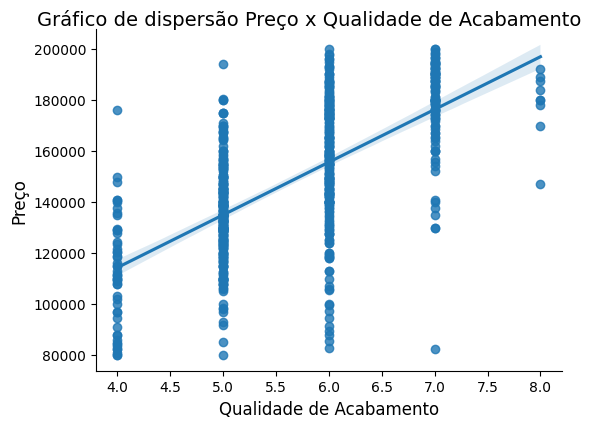

In [75]:
dispersao(df = df, x = 'Qualidade', y = 'Preco', xlabel = 'Qualidade de Acabamento',
                ylabel = 'Preço', titulo = 'Gráfico de dispersão Preço x Qualidade de Acabamento')

* #     7.3 Gráfico de dispersão da variável AnoConstrucao

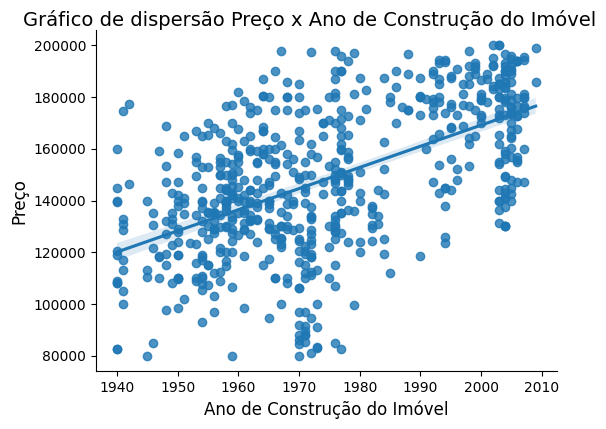

In [76]:
dispersao(df = df, x = 'AnoConstrucao', y = 'Preco', xlabel = 'Ano de Construção do Imóvel',
                ylabel = 'Preço', titulo = 'Gráfico de dispersão Preço x Ano de Construção do Imóvel')

* #     7.4 Gráfico de dispersão da variável Banheiros

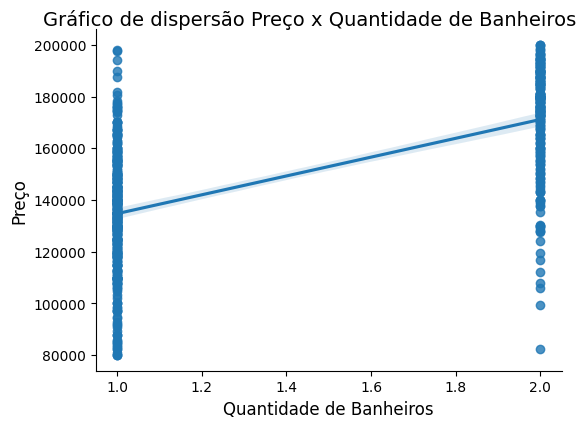

In [77]:
dispersao(df = df, x = 'Banheiros', y = 'Preco', xlabel = 'Quantidade de Banheiros',
                ylabel = 'Preço', titulo = 'Gráfico de dispersão Preço x Quantidade de Banheiros')

* #     7.5 Gráfico de dispersão da variável Comodos

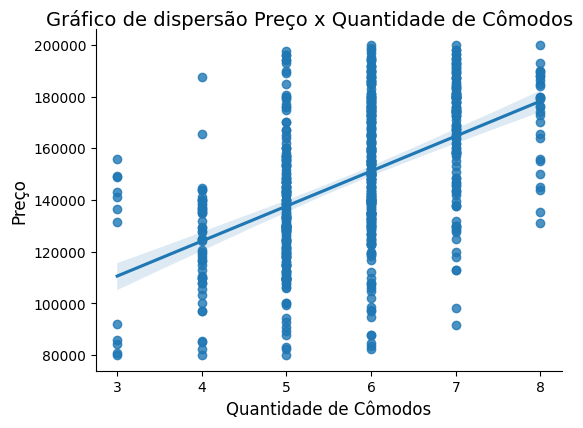

In [78]:
dispersao(df = df, x = 'Comodos', y = 'Preco', xlabel = 'Quantidade de Cômodos',
                ylabel = 'Preço', titulo = 'Gráfico de dispersão Preço x Quantidade de Cômodos')

* #     7.6 Gráfico de dispersão da variável Garagem

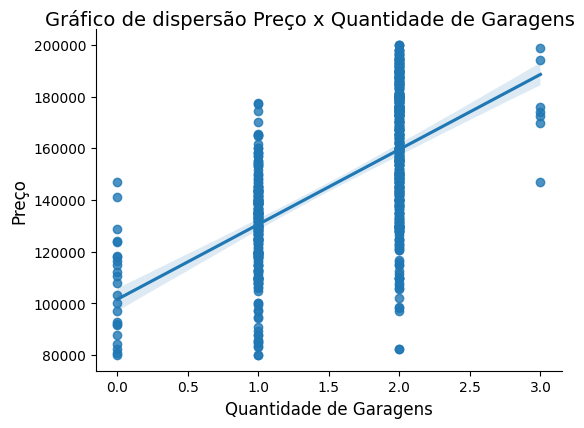

In [79]:
dispersao(df = df, x = 'Garagem', y = 'Preco', xlabel = 'Quantidade de Garagens',
                ylabel = 'Preço', titulo = 'Gráfico de dispersão Preço x Quantidade de Garagens')

##### Os gráficos de dispersão apresentados mostram, de forma prática e visual, como o preço dos imóveis varia em função de diferentes variáveis numéricas, como Área, Qualidade, Ano de construção, Banheiros, entre outras. Por meio desses gráficos, é possível identificar tendências e padrões que reforçam as informações obtidas na análise estatística. Ao comparar os gráficos com o mapa de calor das correlações, percebemos que algumas variáveis apresentam maior influência sobre o preço. As mais relevantes, com correlação positiva, são: Qualidade da construção (0,66), Banheiros (0,63), Ano de construção (0,56), Garagem (0,60), Cômodos (0,50) e Área (0,30). Essas representações visuais complementam os dados do heatmap e facilitam a compreensão da relação entre o preço e as principais características dos imóveis, evidenciando como essas variáveis contribuem para a valorização.

* # 8. Preparar os dados para aplicar um modelo de regressão linear múltipla, com o objetivo de prever o valor do imóvel com base em suas características

In [80]:
# Importando algumas bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [81]:
dados_nulos = df.isnull().sum()
dados_nulos

,0
Id,0
Zona,0
Area,0
Qualidade,0
AnoConstrucao,0
QualidadeAquecimento,0
Banheiros,0
Quartos_t1,0
Quartos_t2,0
Comodos,0


In [82]:
df.head()

,Id,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco,DecadaConstrucao
0,1,RL,9600,6,1976,Ex,2,3,4,6,1,2,181500,1970
1,2,RL,14115,5,1993,Ex,1,1,2,5,0,2,143000,1990
2,3,RL,11200,5,1965,Ex,1,3,4,5,0,1,129500,1960
3,4,RL,12968,5,1962,TA,1,2,3,4,0,1,144000,1960
4,5,RL,10920,6,1960,TA,1,2,3,5,1,1,157000,1960


### Aplicaremos técnicas de encoding para transformar as variáveis categóricas em numéricas.
* ### Zona ▶ Encoding

In [83]:
# realizando o label encoding na variável zona
LbEncoder = LabelEncoder()
df['Zona_lb'] = LbEncoder.fit_transform(df['Zona'])
df.head(3)

,Id,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco,DecadaConstrucao,Zona_lb
0,1,RL,9600,6,1976,Ex,2,3,4,6,1,2,181500,1970,0
1,2,RL,14115,5,1993,Ex,1,1,2,5,0,2,143000,1990,0
2,3,RL,11200,5,1965,Ex,1,3,4,5,0,1,129500,1960,0


In [84]:
df['Zona'].value_counts()

,count
Zona,
RL,555
RM,74


In [85]:
df['Zona_lb'].value_counts()

,count
Zona_lb,
0,555
1,74


##### Conforme mostrado acima, a categoria 'RL' foi codificada como 0 e 'RM' como 1.

## Divisão dos dados entre Treino e Teste.

In [86]:
# Definindo as variáveis independentes (X) e a variável dependente (y)
x = df[['Area', 'Qualidade', 'AnoConstrucao', 'Banheiros', 'Comodos', 'Lareiras','Garagem', 'Zona_lb']]

y = df['Preco']

# Separando os dados em treino (80%) e teste (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [87]:
print('Valores nulos em x:')
print(x.isnull().sum())
print("\nValores nulos em y:")
print(y.isnull().sum())

Valores nulos em x:
Area             0
Qualidade        0
AnoConstrucao    0
Banheiros        0
Comodos          0
Lareiras         0
Garagem          0
Zona_lb          0
dtype: int64

Valores nulos em y:
0


* # 9.  Construir e treinar o modelo de regressão

  * ### 9.1  Avaliando a importância das variáveis selecionadas na explicação do modelo de regressão.

    * **Features selecionadas:**
      * Área / Property area
      * Nível de qualidade de Acabamento do imóvel / Quality of finishing
      * Banheiros / Number of bathrooms
      * Cômodos / Total number of rooms
      * Ano de construção / Year of construction
      * Zona de residencial / Residential zone type
      * N° de vagas na garagem / Number of garage spaces
      * N° de lareiras / Number of fireplaces



In [88]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics

In [89]:
# criando o modelo baseline
modelo_baseline = DummyRegressor(strategy = 'mean')

# treinando o modelo baseline
modelo_baseline.fit(x_train, y_train)

# obtendo as previsões do modelo baseline
y_previsto_baseline = modelo_baseline.predict(x_test)

# observando as métricas
r2_baseline = metrics.r2_score(y_test, y_previsto_baseline)
mae_baseline = metrics.mean_absolute_error(y_test, y_previsto_baseline)
mape_baseline = np.mean( np.abs(y_test - y_previsto_baseline) / y_test ) * 100
rmse_baseline = np.sqrt(metrics.mean_squared_error(y_test, y_previsto_baseline))

# tabela de métricas
pd.DataFrame([np.abs(r2_baseline), mae_baseline, mape_baseline, rmse_baseline]).rename(index = {0: 'R2 Baseline',1: 'MAE Baseline', 2: 'MAPE Baseline (%)', 3: 'RMSE Baseline'},columns = {0: 'Métricas Original'}).round(2)

,Métricas Original
R2 Baseline,0.00
MAE Baseline,23691.61
MAPE Baseline (%),17.57
RMSE Baseline,28309.36


##### A partir da tabela de métricas apresentada, é possível perceber que a estratégia atual da empresa para precificar os imóveis — baseada apenas na média dos preços de mercado e em percepções subjetivas — não representa bem a variabilidade dos dados. Além disso, o erro percentual absoluto médio ficou em 17,57%, um valor elevado. Isso indica que, em média, os preços definidos pela empresa estão com uma diferença de 17,57% em relação ao valor real dos imóveis, o que pode comprometer significativamente a receita e gerar prejuízos.

  * ## 9.3 Implementação do modelo de regressão linear

In [90]:
# criando o modelo
modelo = LinearRegression()

# treinando o modelo
modelo.fit(x_train, y_train)

# previsões do modelo
y_previsto = modelo.predict(x_test)

# Observando métricas
r2 = metrics.r2_score(y_test, y_previsto)
mae = metrics.mean_absolute_error(y_test, y_previsto)
mape = np.mean( np.abs(y_test - y_previsto) / y_test ) * 100
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_previsto))

# tabela de métricas
pd.DataFrame([r2, mae, mape, rmse]).rename(index = {0: 'R2', 1: 'MAE', 2: 'MAPE (%)', 3: 'RMSE'}, columns = {0: 'Métricas Após Teste'}).round(2)

,Métricas Após Teste
R2,0.76
MAE,10617.94
MAPE (%),7.84
RMSE,13900.08


In [91]:
# Coeficientes do modelo de regressão.
df = pd.DataFrame(modelo.coef_.round(2)).rename(columns = {0: 'Coeficientes do modelo de regressão'}, index = {
    0: 'Area',
    1: 'Nível de Qualidade do acabamento',
    2: 'Ano de Construção',
    3: 'N° de banheiros',
    4: 'Cômodos',
    5: 'Lareiras',
    6: 'Garagem',
    7: 'Zona residêncial'
})
df.loc[8] = modelo.intercept_
df.rename(index = {8: 'intercepto'}).round(2)
print(df)

                                  Coeficientes do modelo de regressão
Area                                                         1.440000
Nível de Qualidade do acabamento                          8554.020000
Ano de Construção                                          349.980000
N° de banheiros                                           6589.540000
Cômodos                                                   2927.910000
Lareiras                                                  5563.120000
Garagem                                                  10934.000000
Zona residêncial                                        -11657.780000
8                                                      -648615.511022


##### Com a adoção do novo modelo de precificação de imóveis, desenvolvido por mim na função de cientista de dados da empresa, observou-se uma melhora significativa na performance do processo de estimativa de preços. A análise das métricas revela que o novo modelo apresenta um erro percentual absoluto médio (MAPE) de apenas 7,77%, indicando que, em média, as previsões se desviam apenas 7,77% do valor real dos imóveis — um resultado muito mais preciso em comparação com o método anterior adotado pela empresa, que apresentava um MAPE de 17,57%.Essa maior precisão contribui diretamente para o aumento do faturamento, uma vez que os imóveis passam a ser adquiridos por valores mais próximos do real, reduzindo perdas financeiras.


* # 10.  Responder questionamentos do projeto feito pelo diretor executivo
    * #### 10.1 **Qual seria o valor estimado de venda de um imóvel com as seguintes especificações? **

      * Área construída / Built area: 8.750 pés²/ft²
      * Nível de acabamento / Level of finish: 6
      * Ano em que foi construído / Year built: 1985
      * Quantidade de banheiros / Number of bathrooms: 3
      * Número de cômodos / Number of rooms: 7
      * Total de lareiras / Number of fireplaces: 1
      * Vagas disponíveis na garagem / Garage spaces available: 2
      * Localizado em uma zona residencial de média densidade populacional / Located in a medium-density residential zone



In [92]:
Area = 8750
Qualidade = 6
AnoConstrucao = 1985
Banheiros = 3
Comodos = 7
Lareiras = 1
Garagem = 2
Zona = 1
#Lembrando que a Zona fizemos um enconding tranformando
#RL = 0
#RM = 1

entrada = [[Area, Qualidade, AnoConstrucao, Banheiros, Comodos, Lareiras, Garagem, Zona]]

# Efetuando a estimativa precisa do preço do imóvel
valor_imovel = modelo.predict(entrada).round(2)[0]


print(f'O preço estimado para um imóvel com essas características é de US$ {valor_imovel} dólares');

O preço estimado para um imóvel com essas características é de US$ 166069.84 dólares


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##### O preço estimado para um imóvel com essas características é de US$ 166069,84 dólares.

##### As variáveis Quartos_t1 e Quartos_t2 foram excluídas do modelo de previsão de preços devido à ausência de definição clara sobre o significado dos sufixos 't1' e 't2', o que poderia comprometer a integridade da análise e a interpretabilidade dos resultados. Embora a remoção dessas variáveis tenha resultado em um pequeno aumento no erro percentual absoluto médio (MAPE), de 7,77% para 7,84%, optou-se por manter o modelo mais confiável e robusto, priorizando a consistência metodológica. Ainda assim, o valor estimado para o imóvel, com base nas características fornecidas pela diretoria executiva, manteve-se tecnicamente adequado e compatível com a realidade de mercado, evidenciando a eficácia do modelo mesmo após o ajuste.


 #### 10.2 **Quais atributos do imóvel exercem maior influência no preço final de venda **


* Qualidade do Acabamento

##### A elevação do nível de acabamento do imóvel do nível 6 para o nível 7 representa um acréscimo de US$ 8.554,02 no valor estimado do imóvel.

* Número de Banheiros

##### O aumento de 3 para 4 banheiros resulta em uma valorização de US$ 6.589,55.

* Número de Garagens

##### A adição de uma garagem — passando de 2 para 3 vagas — eleva o preço do imóvel em US$ 10.934,00.

* Zona Residencial

##### A mudança da localização do imóvel de uma zona de média densidade para uma zona de baixa densidade resulta em um aumento de US$ 11.657,79 no valor de mercado.





#### 10.3 **Imóveis situados em áreas residenciais com menor densidade tendem a apresentar preços mais elevados do que os localizados em zonas de maior densidade?**

##### Conforme observado na análise anterior, os imóveis situados em zonas de baixa densidade populacional tendem a apresentar valores superiores aos localizados em áreas de média densidade. Essa diferença pode ser explicada por diversos fatores. Zonas de baixa densidade geralmente oferecem maior privacidade, tranquilidade e qualidade de vida, características valorizadas por um público disposto a pagar mais por esses benefícios. Além disso, essas áreas costumam ter menor poluição sonora e ambiental, o que aumenta seu apelo. O ambiente mais exclusivo e reservado, aliado a um menor adensamento populacional, faz com que os imóveis nessas regiões tenham maior valor de mercado. Esse cenário atrai compradores que priorizam conforto e exclusividade, o que impulsiona a valorização dos imóveis.



* # 11.  **Conclusão**

#### Com base na análise realizada, desenvolvemos um modelo preditivo sólido, capaz de estimar com mais precisão o valor justo de compra de imóveis residenciais. Ao considerar variáveis como área construída, número de banheiros, ano de construção e outras características estruturais e de localização, identificamos quais fatores têm maior impacto na formação dos preços no mercado imobiliário. Nosso modelo conseguiu reduzir o erro absoluto médio (MAE) em 55,18% em comparação ao método atualmente utilizado pela empresa para estimar o preço de compra. Com isso, atendemos aos objetivos propostos, entregando faixas de valor mais confiáveis para aquisição, além de evidências claras sobre os atributos que mais influenciam o preço dos imóveis. Assim, a HabitaData Analytics ganha uma ferramenta importante para minimizar riscos na compra e tomar decisões mais seguras na revenda, garantindo margens de lucro mais sólidas. Esse projeto reforça o quanto a análise de dados é essencial para a gestão inteligente de ativos imobiliários, ajudando a empresa a ser mais competitiva, eficiente e a obter um retorno financeiro mais consistente.




